# MD004 ENTREGA7 ENTROPÍA


Se dispone del siguiente dataset que contiene características de dos tipos de calabazas. El objetivo será elaborar un modelo de regresión logística que nos permita realizar una predicción sobre si la calabaza es del tipo Urgup_Sivrisi (0) o del tipo Cercevelik (1)

- Area: área de la calabaza
- Perimeter: perímetro de la calabaza
- Major_Axis_Length: Longitud del eje más largo de la calabaza
- Minor_Axis_Length: Longitud del eje más corto de la calabaza
- Convex_Area: Área convexa de la calabaza
- Equiv_Diameter: Diámetro equivalente
- Eccentricity: Excentricidad de la calabaza
- Solidity: Solidez de la calabaza
- Extent: Alcance de la calabaza
- Roundness: Redondez de la calabaza
- Aspect_Ration: Relación de aspecto de la calabaza
- Compactness: Compactibilidad de la calabaza
- Class: Clase de la calabaza


###### Data: 
20240123_Semillas_calabaza.csv'

###### Se pide:

1. Visualización, limpieza y comprensión del dataset (1p): realizar un estudio previo al tratamiento de los datos para comprender mejor la información de la que se dispone
2. Elección de variables:
- Análisis de la información mutua (2p)
- Estudio de la correlación entre las variables (1p)
- Estudio de las componentes principales: no olvidéis las visualizaciones en este apartado (2p)
3. Desarrollo de un modelo de Regresión logística (3p): justificad la elección de variables finales y valoración del modelo en función de la matriz de confusión

Nota: realizad un cambio en la variable clase para establecer como 0 el tipo de calabaza Urgup_Sivrisi y como 1 para el tipo Cercevelik
;) Recuerda realizar un apartado de conclusiones que recoja las principales observaciones a lo largo del ejercicio

<br> 
<div>
<img src="attachment:image-6.png" width="500"/>
</div>



## <font color='#3d59c6'>  0. CARGA DE PACKAGES </font>

- **tidyverse:** esta librería nos será útil en todo el proceso del análisis descriptivo así como también, a la hora de manipular los datos. Engloba varias librerías como por ejemplo ggplot2 y dplyr (usados en la sesión anterior)
- **FSelectorRcpp:** implementación 'Rcpp' (Weka) de los algoritmos de selección de características basados ​​en entropía 'FSelector' con soporte de matriz dispersa
- **caret:** Nos ayudará a la hora de evaluar un modelo de aprendizaje automático, sobretodo en el proceso de ajuste de hiperparámetros cuando busquemos optimizarlo. Además, contiene funciones para realizar validación cruzada
- **ggplot2**: la usamos para crear gráficos más personalizables o dicho de otra manera, podremos crear visualizaciones complejas.
- **GGally**: es una extensión de ggplot2 con funciones adicionales para crear matrices de gráficos, lo que facilita la exploración de relaciones entre múltiples variables
- **gridExtra:** con esta librería podremos organizar y personalizar nuestros gráficos, así como mapear varios gráficos en una única área

In [2]:
library(tidyverse)
library(FSelectorRcpp)
library(caret)
library(ggplot2)
library(GGally)
library(gridExtra)
library(olsrr)
library(tidyverse)
library(caret)
library(lmtest)
library(gridExtra)
library(broom)
library(dplyr)
library(corrplot)
library(rlang)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine



Attaching package: 'olsrr'


The following object is masked from 'package:datasets':

    rivers


Loading required package: zoo


Attaching package: 'zoo'


The 

## <font color='#3d59c6'>  1. CARGA DE DATOS </font>

In [3]:
data = read.csv(file='20240123_Semillas_calabaza.csv', header=TRUE, sep=',', dec='.')

## <font color='#3d59c6'>  2. ANALÍSIS DESCRIPTIVO </font>

In [4]:
head(data)#de forma predefinida retorna las primeras 6 observations
tail(data)#de forma predefinida retorna las últimas 6 observations
#observamos el tipo de datos, cuantos registros tiene el dataset y cuantas variables
str(data)
summary(data)
na_counts_per_column <- colSums(is.na(data))
print(na_counts_per_column)

,X,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
2,2,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
3,3,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
4,4,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
5,5,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik
6,6,73191,1041.460,405.8132,231.4261,73969,305.2698,0.8215,0.9895,0.7165,0.8480,1.7535,0.7522,Çerçevelik


,X,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2495,2495,79755,1146.431,470.3888,217.8296,80649,318.6647,0.8863,0.9889,0.7175,0.7626,2.1594,0.6774,Ürgüp Sivrisi
2496,2496,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,Ürgüp Sivrisi
2497,2497,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,Ürgüp Sivrisi
2498,2498,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
2499,2499,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi
2500,2500,84934,1159.933,462.8951,234.5597,85781,328.8485,0.8621,0.9901,0.7360,0.7933,1.9735,0.7104,Ürgüp Sivrisi


'data.frame':	2500 obs. of  14 variables:
 $ X                : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Area             : int  56276 76631 71623 66458 66107 73191 73338 69692 95727 73465 ...
 $ Perimeter        : num  888 1068 1083 992 998 ...
 $ Major_Axis_Length: num  326 417 436 382 384 ...
 $ Minor_Axis_Length: num  220 234 211 223 220 ...
 $ Convex_Area      : int  56831 77280 72663 67118 67117 73969 73859 70442 96831 74089 ...
 $ Equiv_Diameter   : num  268 312 302 291 290 ...
 $ Eccentricity     : num  0.738 0.828 0.875 0.812 0.819 ...
 $ Solidity         : num  0.99 0.992 0.986 0.99 0.985 ...
 $ Extent           : num  0.745 0.715 0.74 0.74 0.675 ...
 $ Roundness        : num  0.896 0.844 0.767 0.849 0.834 ...
 $ Aspect_Ration    : num  1.48 1.78 2.07 1.71 1.74 ...
 $ Compactness      : num  0.821 0.749 0.693 0.762 0.756 ...
 $ Class            : chr  "Çerçevelik" "Çerçevelik" "Çerçevelik" "Çerçevelik" ...


       X               Area          Perimeter      Major_Axis_Length
 Min.   :   1.0   Min.   : 47939   Min.   : 868.5   Min.   :320.8    
 1st Qu.: 625.8   1st Qu.: 70765   1st Qu.:1048.8   1st Qu.:415.0    
 Median :1250.5   Median : 79076   Median :1123.7   Median :449.5    
 Mean   :1250.5   Mean   : 80658   Mean   :1130.3   Mean   :456.6    
 3rd Qu.:1875.2   3rd Qu.: 89758   3rd Qu.:1203.3   3rd Qu.:492.7    
 Max.   :2500.0   Max.   :136574   Max.   :1559.5   Max.   :661.9    
 Minor_Axis_Length  Convex_Area     Equiv_Diameter   Eccentricity   
 Min.   :152.2     Min.   : 48366   Min.   :247.1   Min.   :0.4921  
 1st Qu.:211.2     1st Qu.: 71512   1st Qu.:300.2   1st Qu.:0.8317  
 Median :224.7     Median : 79872   Median :317.3   Median :0.8637  
 Mean   :225.8     Mean   : 81508   Mean   :319.3   Mean   :0.8609  
 3rd Qu.:240.7     3rd Qu.: 90798   3rd Qu.:338.1   3rd Qu.:0.8970  
 Max.   :305.8     Max.   :138384   Max.   :417.0   Max.   :0.9481  
    Solidity          Exten

                X              Area         Perimeter Major_Axis_Length 
                0                 0                 0                 0 
Minor_Axis_Length       Convex_Area    Equiv_Diameter      Eccentricity 
                0                 0                 0                 0 
         Solidity            Extent         Roundness     Aspect_Ration 
                0                 0                 0                 0 
      Compactness             Class 
                0                 0 


Estupendo, no hay nulos, y son todo variables categóricas excepto la categoria del tipo de calabaza. A continuación veremos si tenemos el dataset equilibrado.

In [5]:
table(data$Class)


   Çerçevelik Ürgüp Sivrisi 
         1300          1200 

Más o menos tenemos un dataset equilibrado, todo y que tenemos 100 muestras más del tipo Çerçevelik. Así pues lo que vamos a hacer para estar en igualdad de condiciones vamos a coger aleatoriamente 100 entradas del tipo Çerçevelik y las quitaremos de nuestro conjunto de datos.

In [6]:
set.seed(123) # Establece la semilla aleatoria

indices <- which(data$Class == "Çerçevelik")
indices_a_eliminar <- sample(indices, 100)
data_b <- data[-indices_a_eliminar, ]

table(data_b$Class)


   Çerçevelik Ürgüp Sivrisi 
         1200          1200 

In [7]:
data_b_numeric = data_b %>%
  select_if(is.numeric)

Warning message:
"`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information."


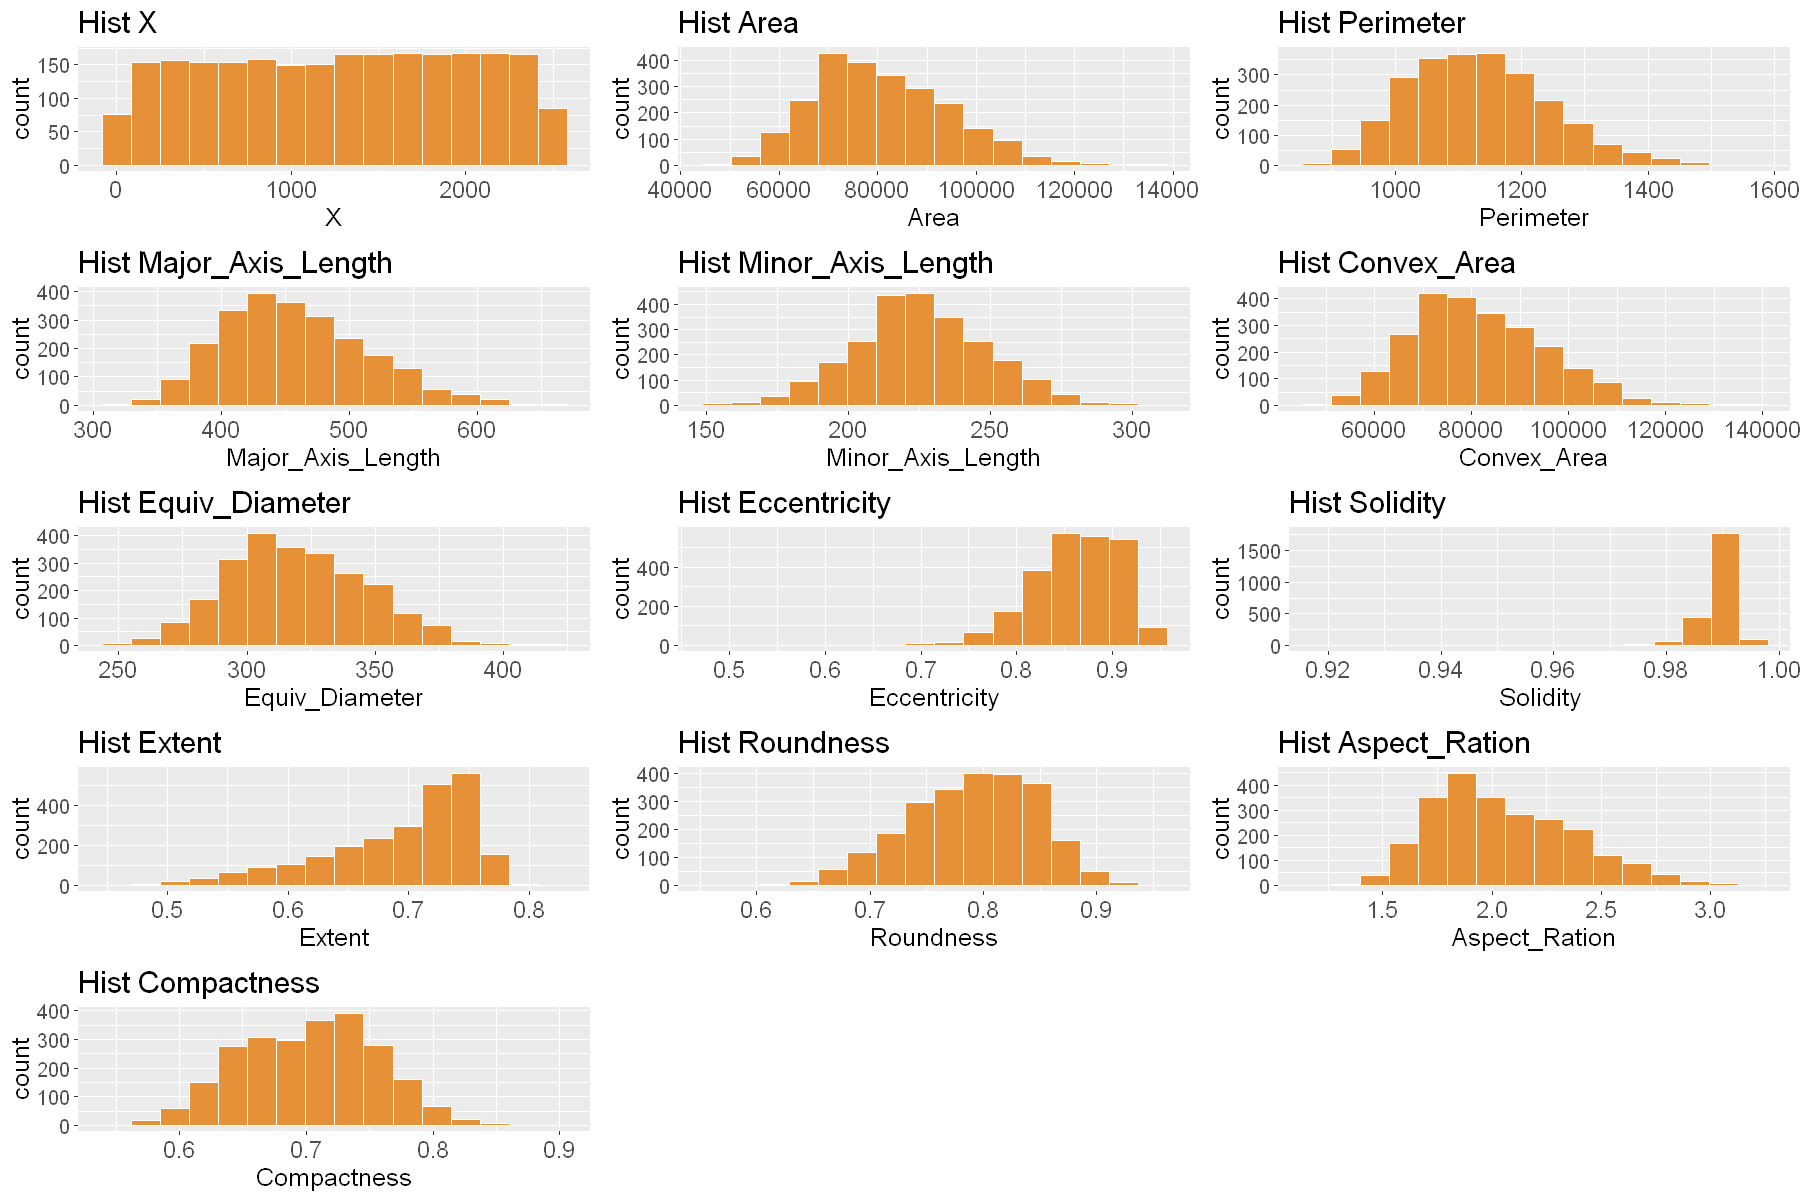

In [8]:
graficos_histograma = list()
var_data = colnames(data_b_numeric)

for (variable in var_data) {

  grafico = ggplot(data_b_numeric) +
    aes_string(x = variable) +
    geom_histogram(bins = 16, fill = '#e69138', color = 'white', na.rm = TRUE) +
    theme(text = element_text(size = 15), axis.text.x = element_text(size = 14)) + 
    labs(title = paste('Hist', variable))
  

  graficos_histograma[[length(graficos_histograma) + 1]] = grafico
}

options(
  repr.plot.width = 15,  
  repr.plot.height = 10  
)

# Mostrar los histogramas en un grid
do.call('grid.arrange', c(graficos_histograma, ncol = 3))

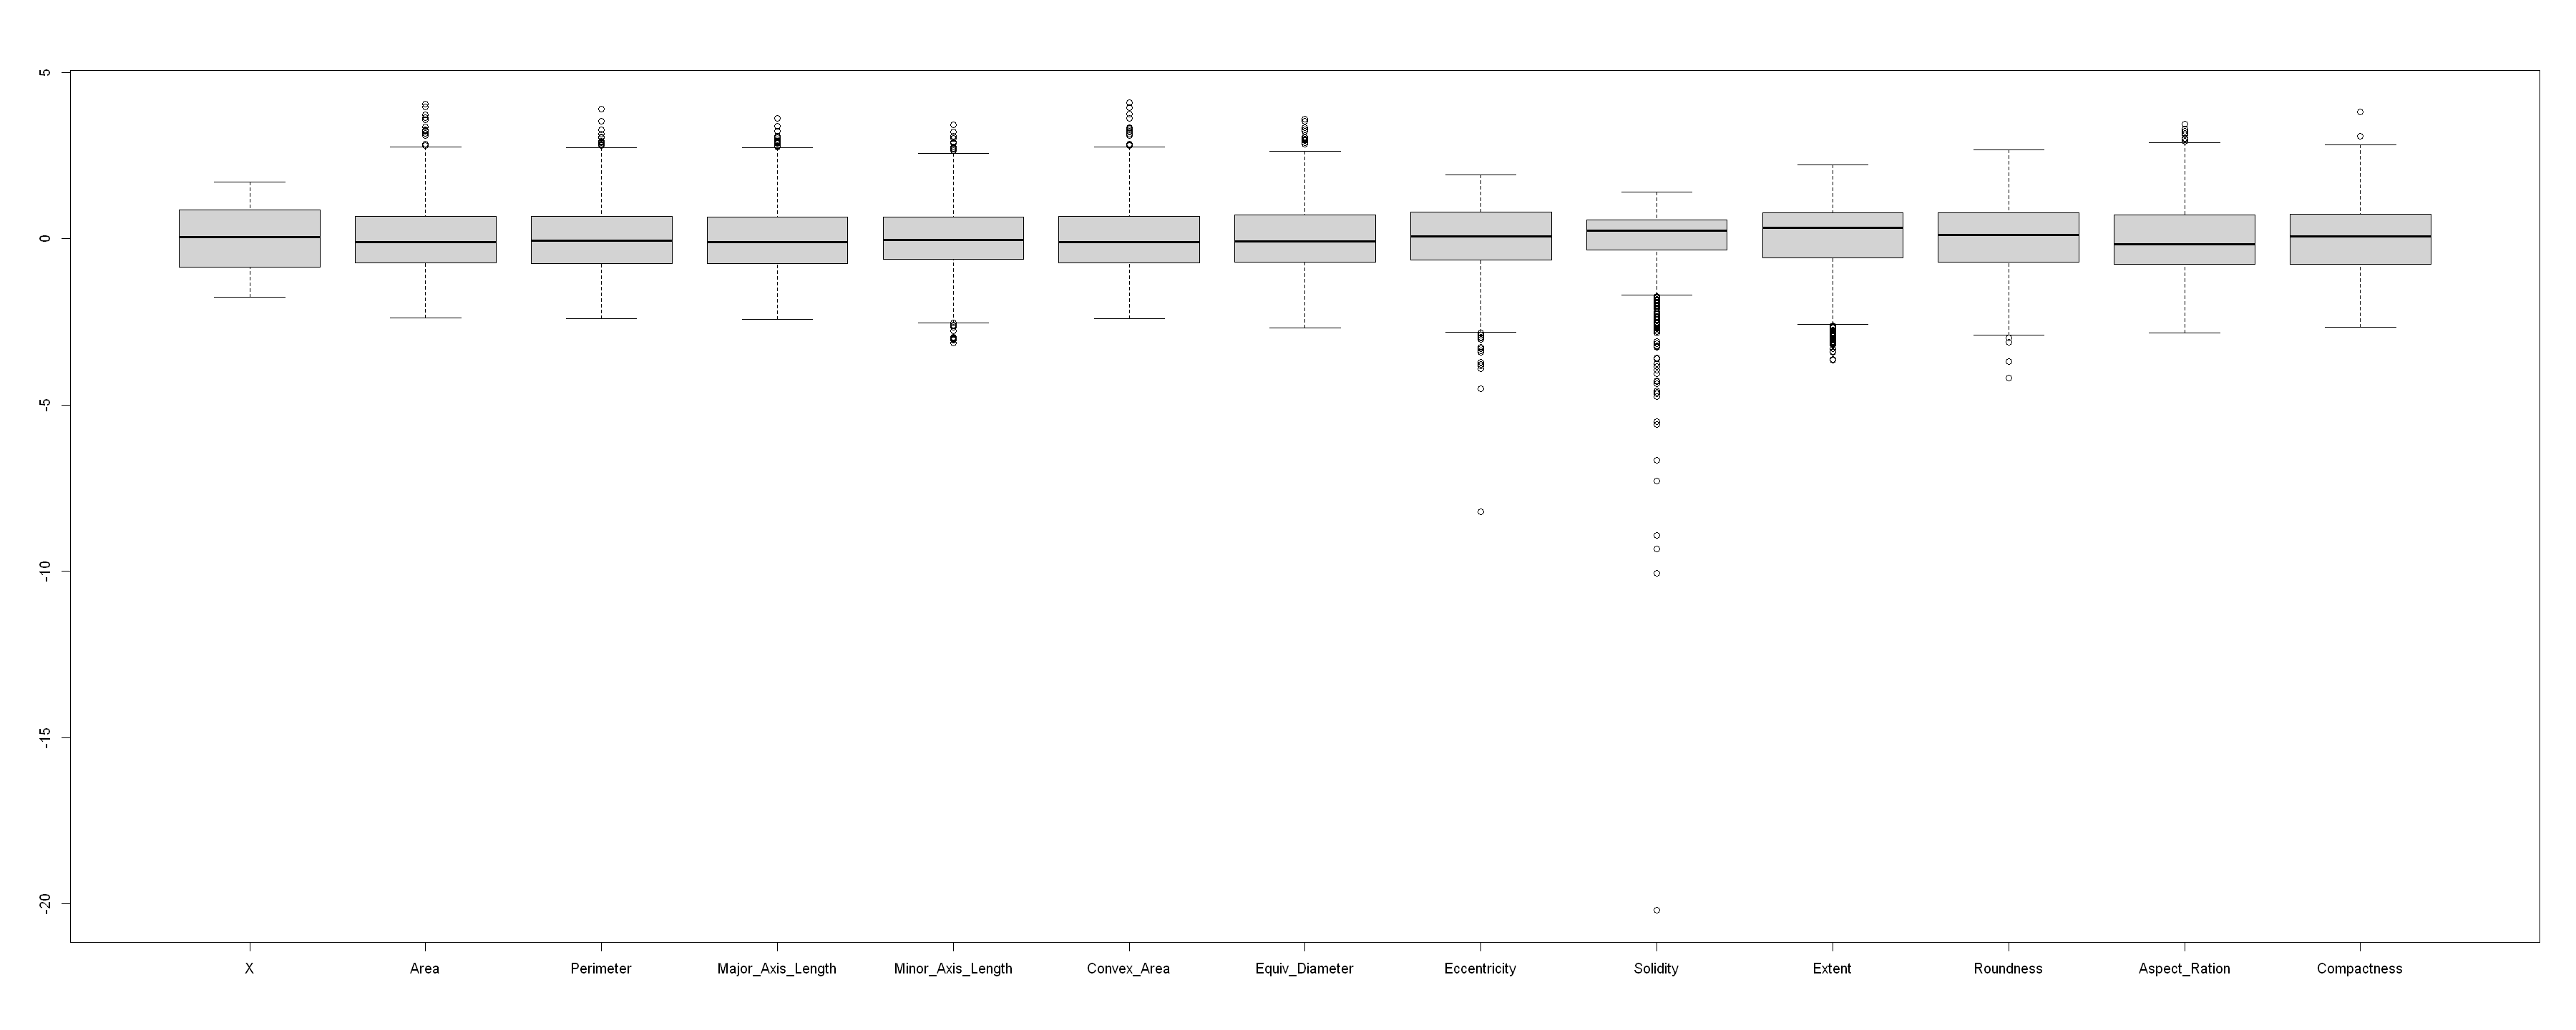

In [9]:
df_standard  <- as.data.frame(lapply(data_b_numeric, scale))
options(
  repr.plot.width = 30,  
  repr.plot.height = 12  
)
boxplot(df_standard)

Vemos como nuestra variable Solidity es la que tiene más outliers.

In [10]:
#Generamos datasets filtrando por la clase
data_b_C = data_b[data_b$Class == 'Çerçevelik',]
data_b_U = data_b[data_b$Class == 'Ürgüp Sivrisi',]

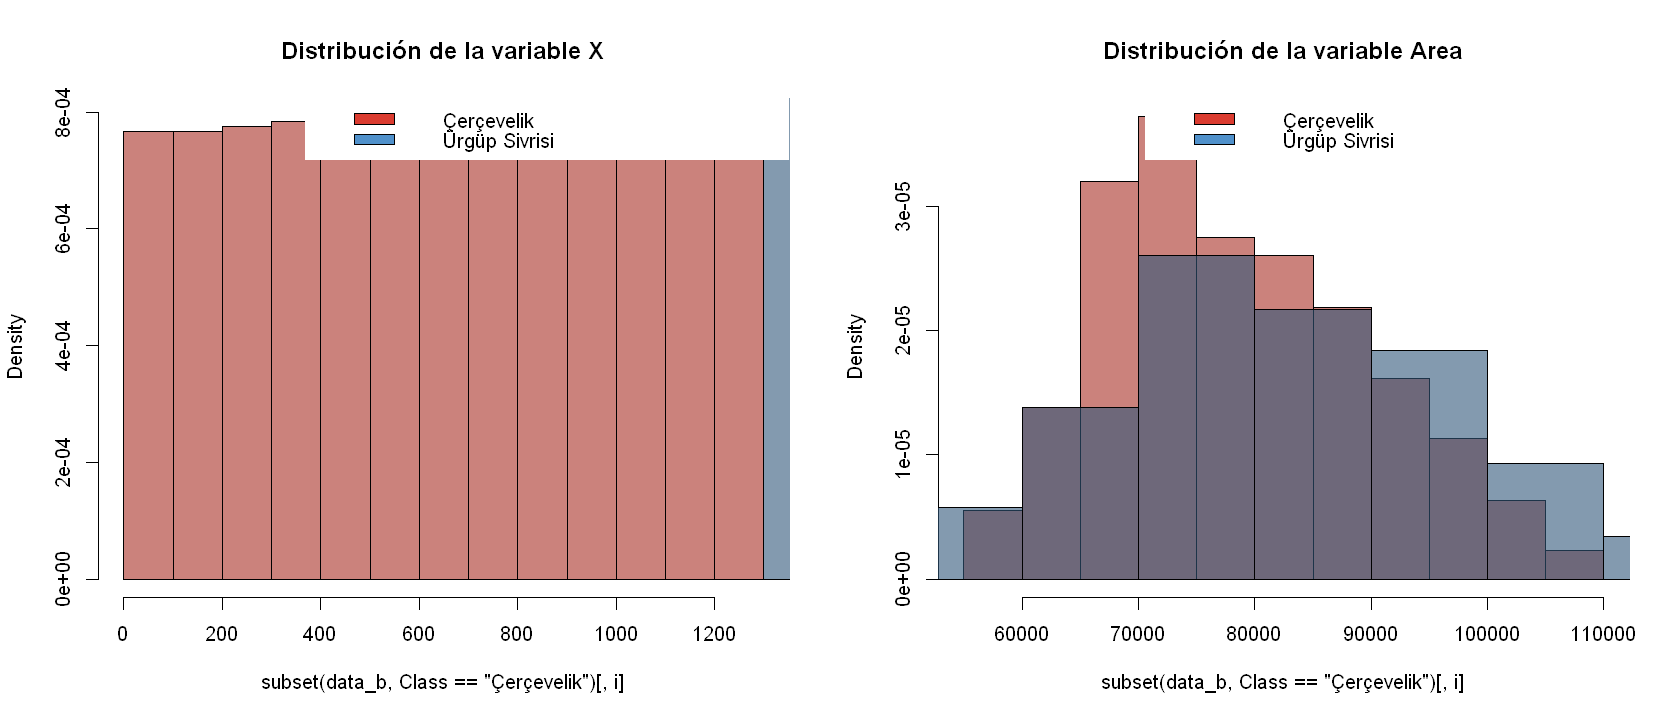

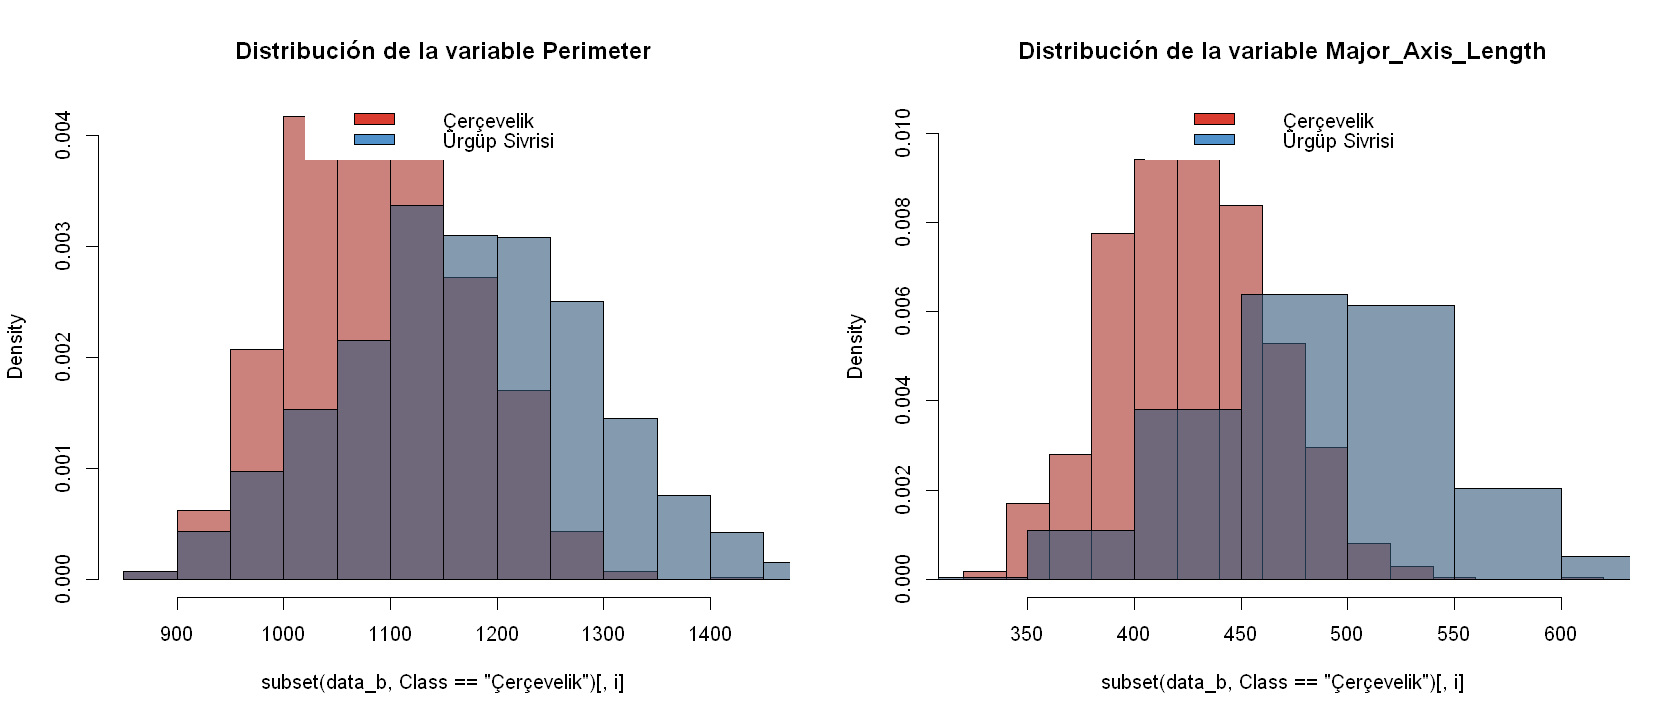

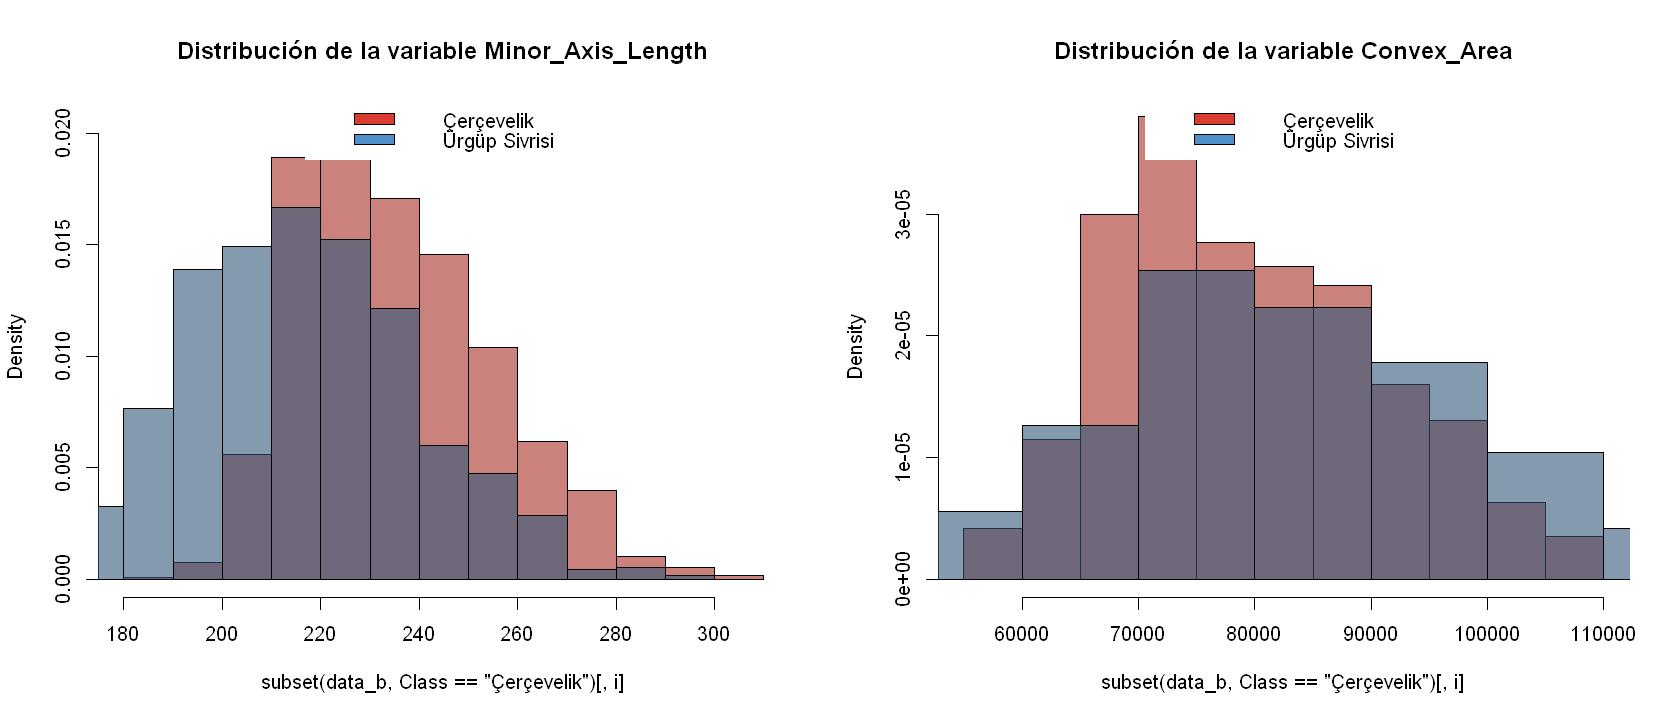

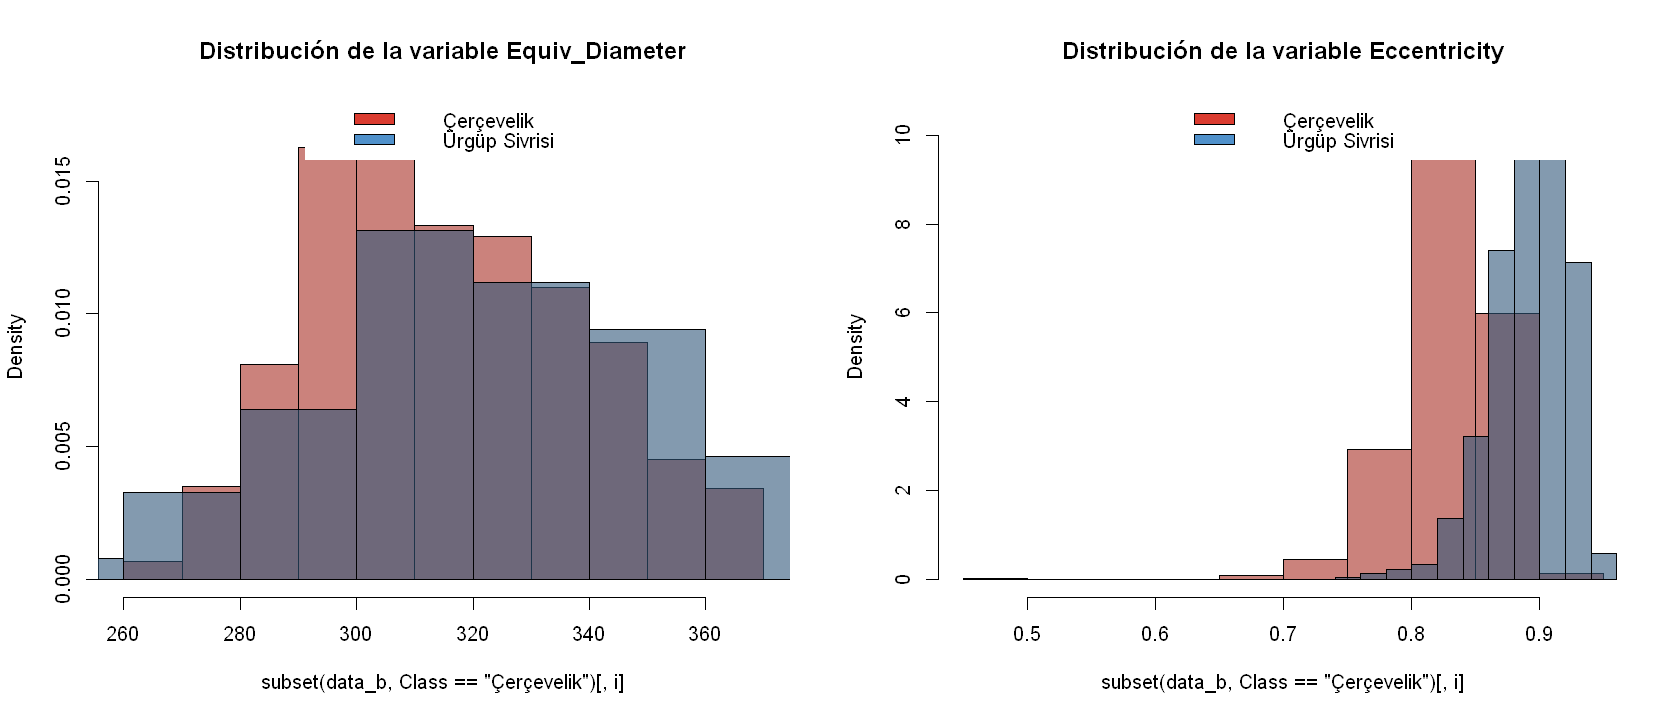

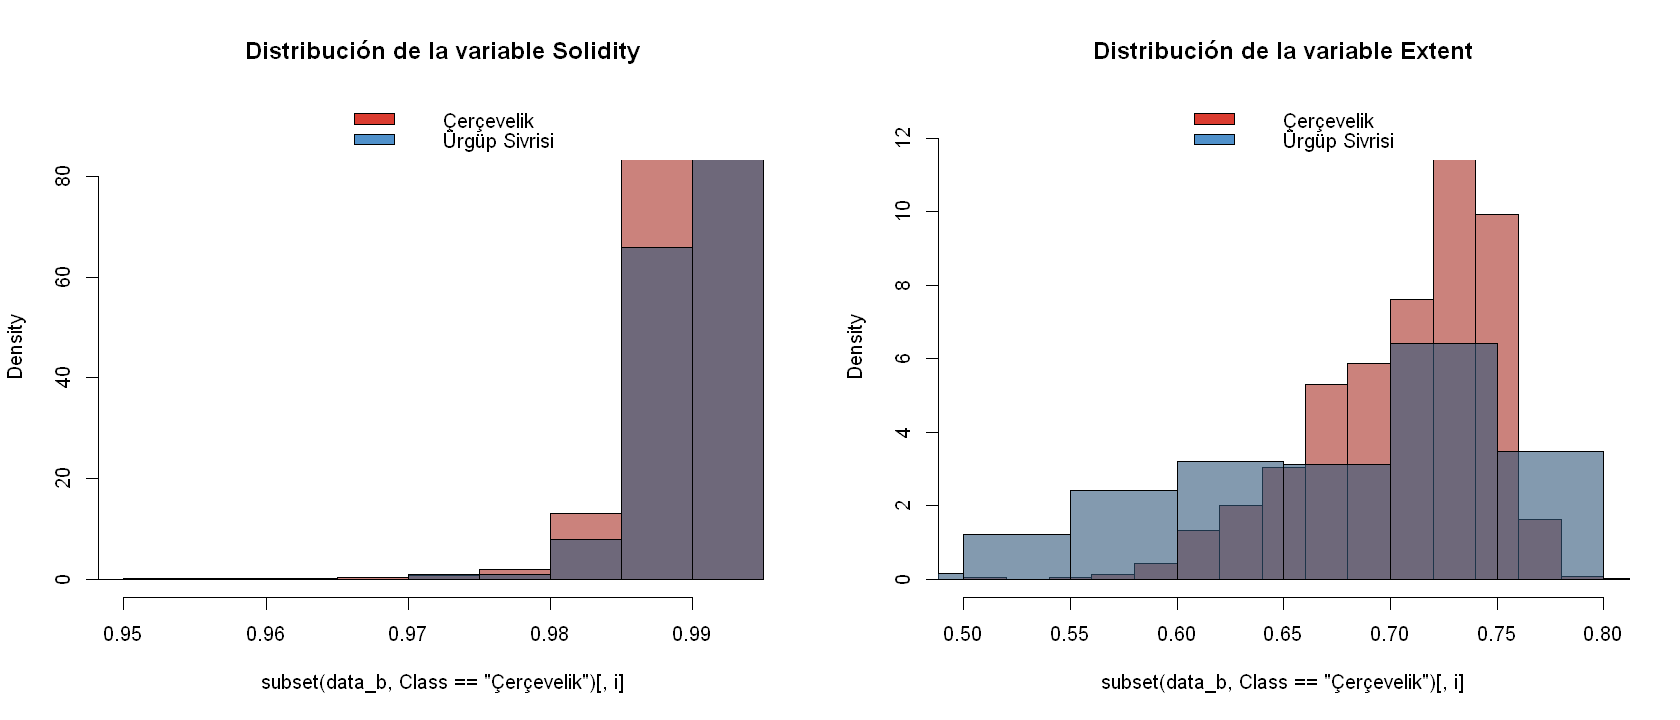

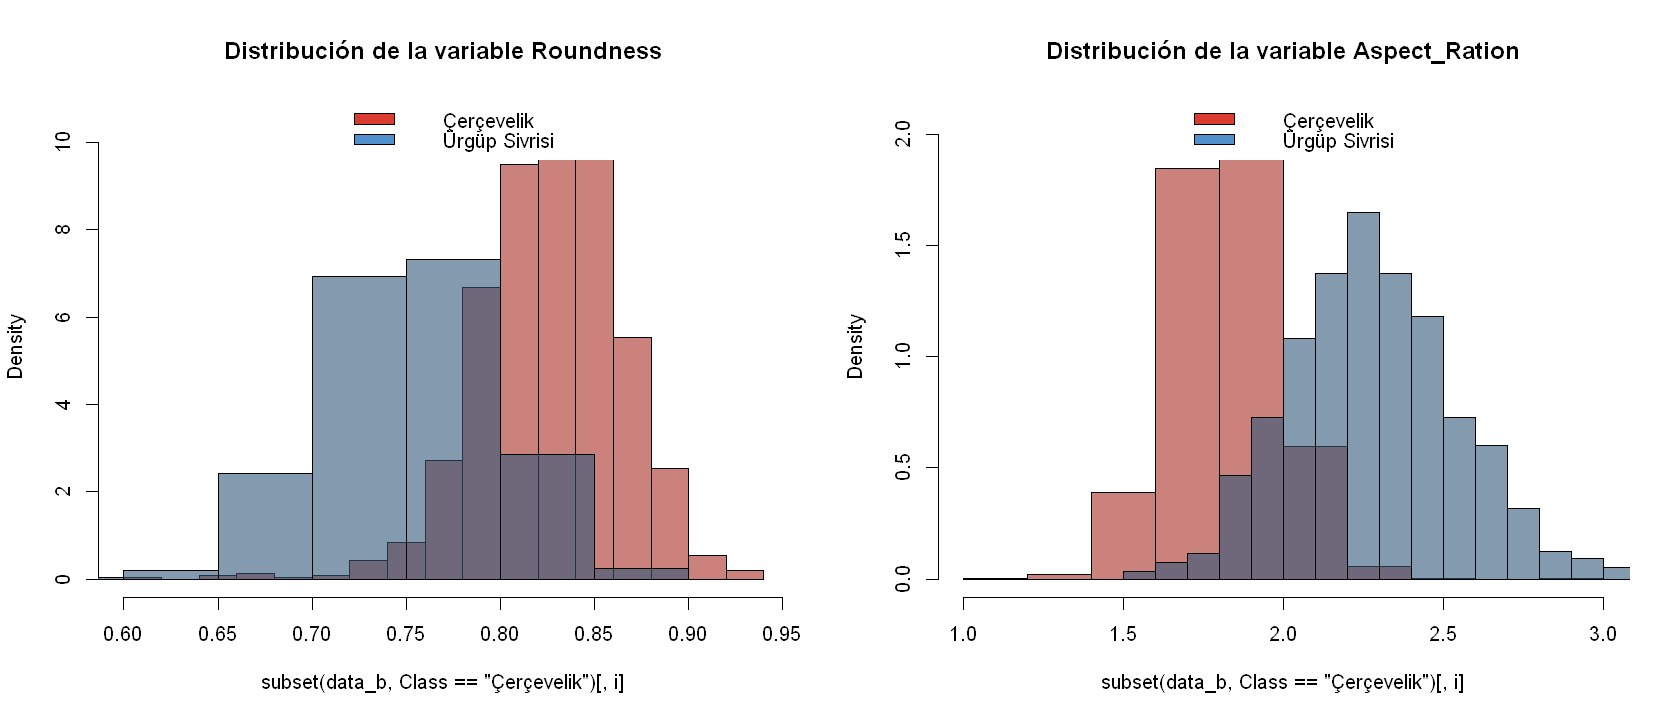

In [11]:
options(
  repr.plot.width = 14,
  repr.plot.height = 6
)

par(mfrow = c(1, 2))
for (i in 1:((length(colnames(data_b)))-2)) {

  hist(subset(data_b, Class == 'Çerçevelik')[, i],
       col = rgb(0.66,0.18,0.14,0.6),
       main = paste0("Distribución de la variable ", colnames(data_b)[i]),
       freq = FALSE)
  hist(subset(data_b, Class == 'Ürgüp Sivrisi')[, i],
     col = rgb(0.187,0.339,0.474,0.6),
       add = TRUE,
       freq = FALSE)
       
  legend(x = "topright", legend = c('Çerçevelik', 'Ürgüp Sivrisi'), fill = c('#db3c30', '#5091cb'), box.lty = "blank")
  if (i %% 2 == 0) {par(mfrow = c(1, 2))}
}

Estos gráficos nos han aportado mucha información puesto que se puede analizar tanto la distribución de las variables ordenadas por categoria y esto nos permite ver desplazamientos en las medias, y como hay variables que tienen valores más altos en función de la categoria. Dejando ver en primera instancia que aparentemente se podría relaizar un modelo de regresión logística que sea capaz de distinguir entre estas dos categorías. 

## <font color='#3d59c6'>  3. ELECCIÓN DE VARIABLES </font>

Se realizará un análisis de Correlaciones donde se observarán sobre todo las variables que tienen relación con la variable target, es decir, la que pretende predecir el modelo. Seguidamente se hará un Análisis de Componentes Principales con la intención de reducir la dimensionalidad de las variables en nuevas variables que sean independientes entre ellas (pues no interesa que haya colinealidad) y ver las variables que sean realmente importantes para explicar la variable target. Después se aplicarán diversos algoritmos que permitirán cuantificar la información mutua y así ver la relevancia de las variables y finalmente, habiendo elegido las variables más adecuadas mediante todos los procedimientos mencionados, se podrá realizar un modelo de regresión logística. El objetivo de este análisis es encontrar las variables que permitan diferenciar el tipo de calabaza.

### <font color='#3d59c6'>  3.1 REALIZACIÓN IGA </font>

Con tal de ver la información mutua entre el target y las covariables se aplican los tres algoritmos detallados a continuación:

- "infogain": ${H(Class)} + H(Attribute) − H(Class, Attribute)$

- "gainratio" : $H(Class) + H(Attribute) − H(Class, Attribute) / H(Attribute) $

- "symuncert" : $2 * (H(Class) + H(Attribute) − H(Class, Attribute)) / (H(Attribute) + H(Class)) $

EL infoGain nos da la información mutua, el gainRatio es una modificación del infoGain diseñada para penalizar las características con un gran número de valores distintos (no es nuestro caso puesto que el dataset esta balanceado) y la Symmetrical Uncertainty es una medida que intenta superar las limitaciones de la Ganancia de Información (infoGain) al tener en cuenta la cantidad de información mutua entre una característica y la clase objetivo, normalizada por la cantidad de información intrínseca en ambas, la característica y la clase objetivo. Esto ayuda a equilibrar el sesgo hacia características con más valores distintos o más información intrínseca, ya que tiene mucho más importancia la entropia conjunta de la característica y la clase objetivo. Es decir, en este último, nos interesa ver que características conjuntamente con la clase objetivo tienen una menor entropía, para que así esto nos de una mayor información.

In [12]:
#Eliminamos la variable X ya que es simplemente el identificador del sujeto y eso lo podemos tener con el índice. 
data_b$X <- NULL 

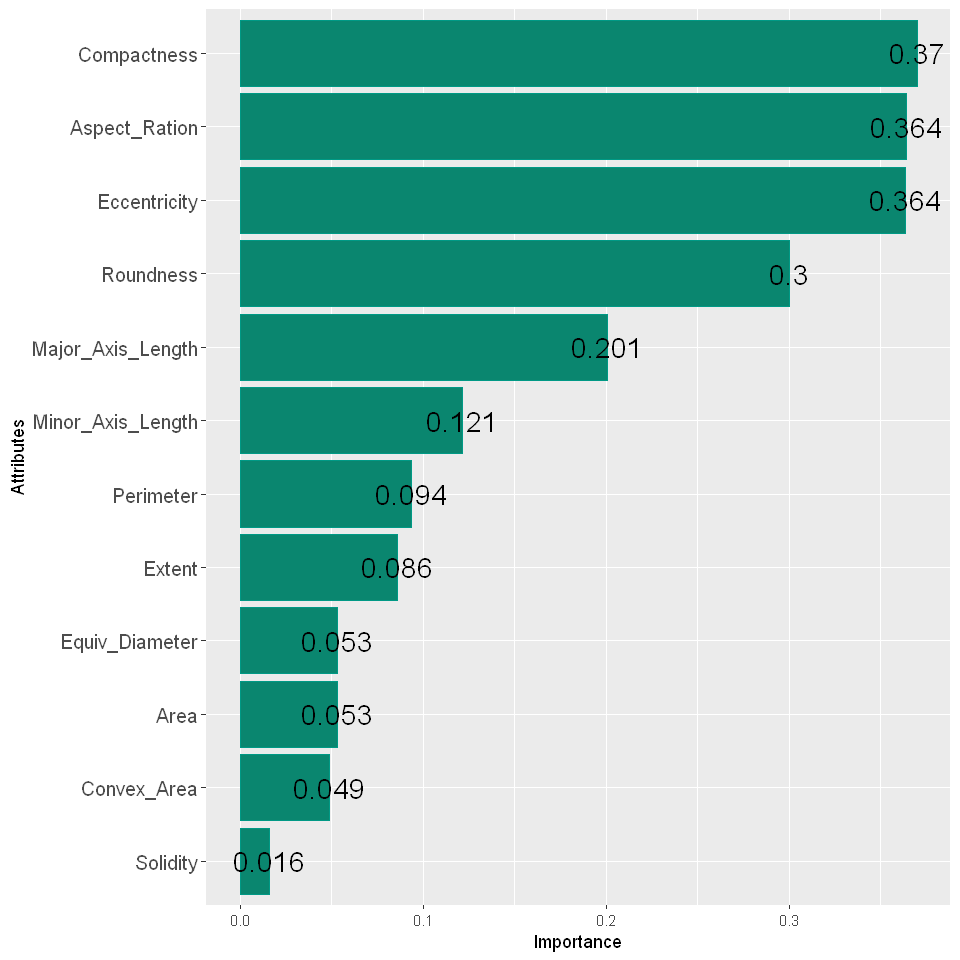

In [13]:
options(repr.plot.width = 8, repr.plot.height = 8 )
ig = information_gain(formula = Class ~ .
                     , data = data_b
                     , type = 'infogain')

ggplot(ig, aes(x = reorder(attributes, +importance), y = importance)) +
 geom_bar(stat = "identity", fill = "#0a866f", color = "#009985") +
geom_text(aes(label =  round(importance, 3)),  color = "black",size = 6) +  # Agregar etiquetas de valores 
  coord_flip() +
  labs(x = "Attributes", y = "Importance")+
  theme(
    axis.text.y = element_text(size = 12))

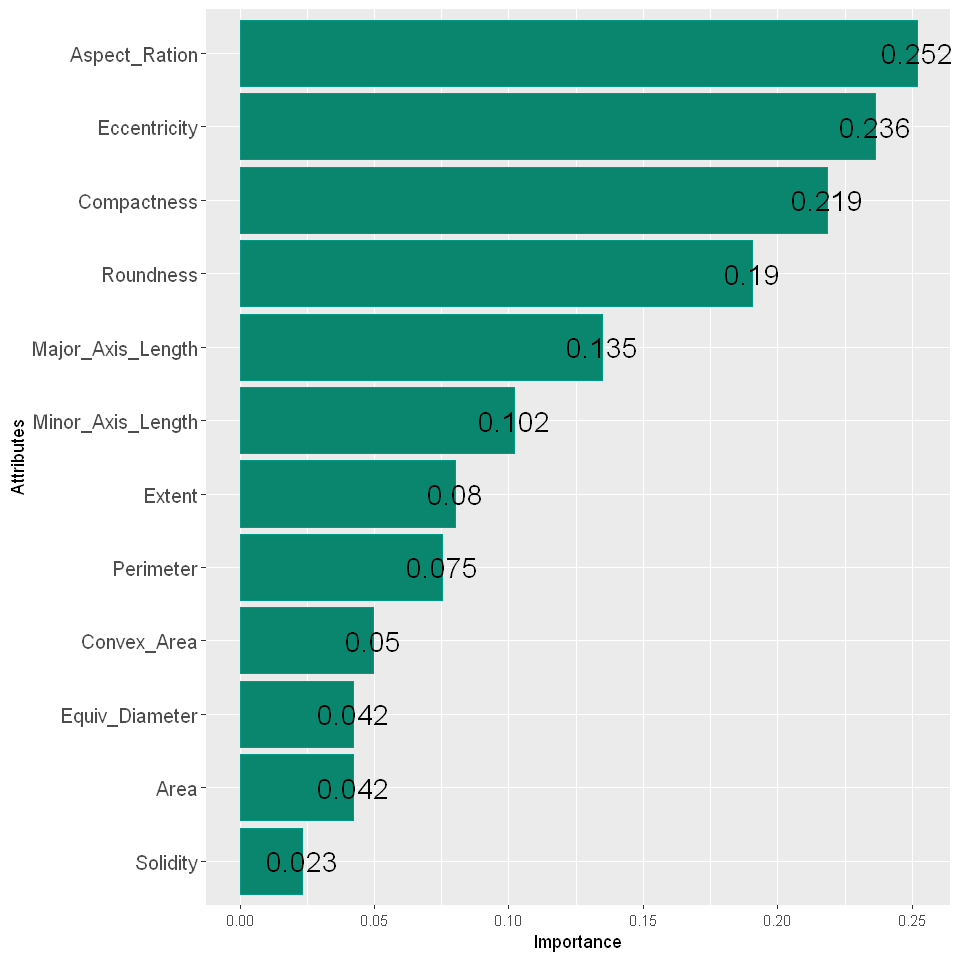

In [14]:
gr = information_gain(formula = Class ~ .
                     , data = data_b
                     , type = 'gainratio')

ggplot(gr, aes(x = reorder(attributes, +importance), y = importance)) +
 geom_bar(stat = "identity", fill = "#0a866f", color = "#009985") +
geom_text(aes(label =  round(importance, 3)),  color = "black",size = 6) +  # Agregar etiquetas de valores 
  coord_flip() +
  labs(x = "Attributes", y = "Importance")+
  theme(
    axis.text.y = element_text(size = 12))

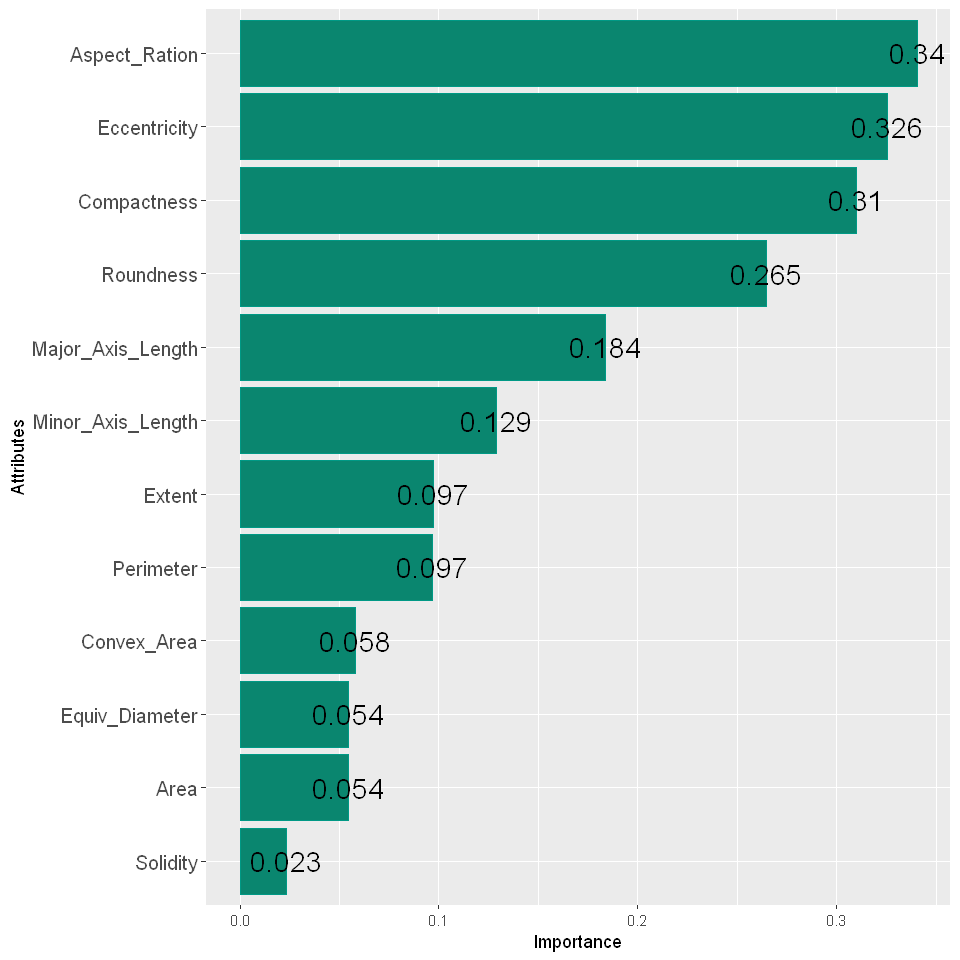

In [15]:
gr = information_gain(formula = Class ~ .
                     , data = data_b
                     , type = 'symuncert')

ggplot(gr, aes(x = reorder(attributes, +importance), y = importance)) +
 geom_bar(stat = "identity", fill = "#0a866f", color = "#009985") +
geom_text(aes(label =  round(importance, 3)),  color = "black",size = 6) +  # Agregar etiquetas de valores 
  coord_flip() +
  labs(x = "Attributes", y = "Importance")+
  theme(
    axis.text.y = element_text(size = 12))

Vemos como en el top 4 tenemos siempre a las mismas variables, lo que nos indica que estas tres son capaces de explicar muy bien nuestro dataset. 

"Aspect_Ratio", "Eccentricity" y "Compactness"

### <font color='#3d59c6'>  3.2 ANÁLISIS CORRELACIONES </font>

In [16]:
data_b_num = data_b %>%
  select_if(is.numeric)

In [17]:

round(cor(data_b_num),2)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
Area,1.00,0.93,0.79,0.69,1.00,1.00,0.15,0.16,-0.01,-0.14,0.15,-0.15
Perimeter,0.93,1.00,0.95,0.40,0.93,0.93,0.46,0.07,-0.14,-0.50,0.48,-0.48
Major_Axis_Length,0.79,0.95,1.00,0.10,0.79,0.79,0.70,0.12,-0.21,-0.68,0.73,-0.72
Minor_Axis_Length,0.69,0.40,0.10,1.00,0.69,0.69,-0.59,0.09,0.23,0.56,-0.60,0.60
Convex_Area,1.00,0.93,0.79,0.69,1.00,1.00,0.15,0.14,-0.02,-0.15,0.15,-0.15
Equiv_Diameter,1.00,0.93,0.79,0.69,1.00,1.00,0.15,0.16,-0.01,-0.14,0.15,-0.15
Eccentricity,0.15,0.46,0.70,-0.59,0.15,0.15,1.00,0.04,-0.32,-0.89,0.95,-0.98
Solidity,0.16,0.07,0.12,0.09,0.14,0.16,0.04,1.00,0.07,0.20,0.03,-0.02
Extent,-0.01,-0.14,-0.21,0.23,-0.02,-0.01,-0.32,0.07,1.00,0.35,-0.33,0.33
Roundness,-0.14,-0.50,-0.68,0.56,-0.15,-0.14,-0.89,0.20,0.35,1.00,-0.94,0.93


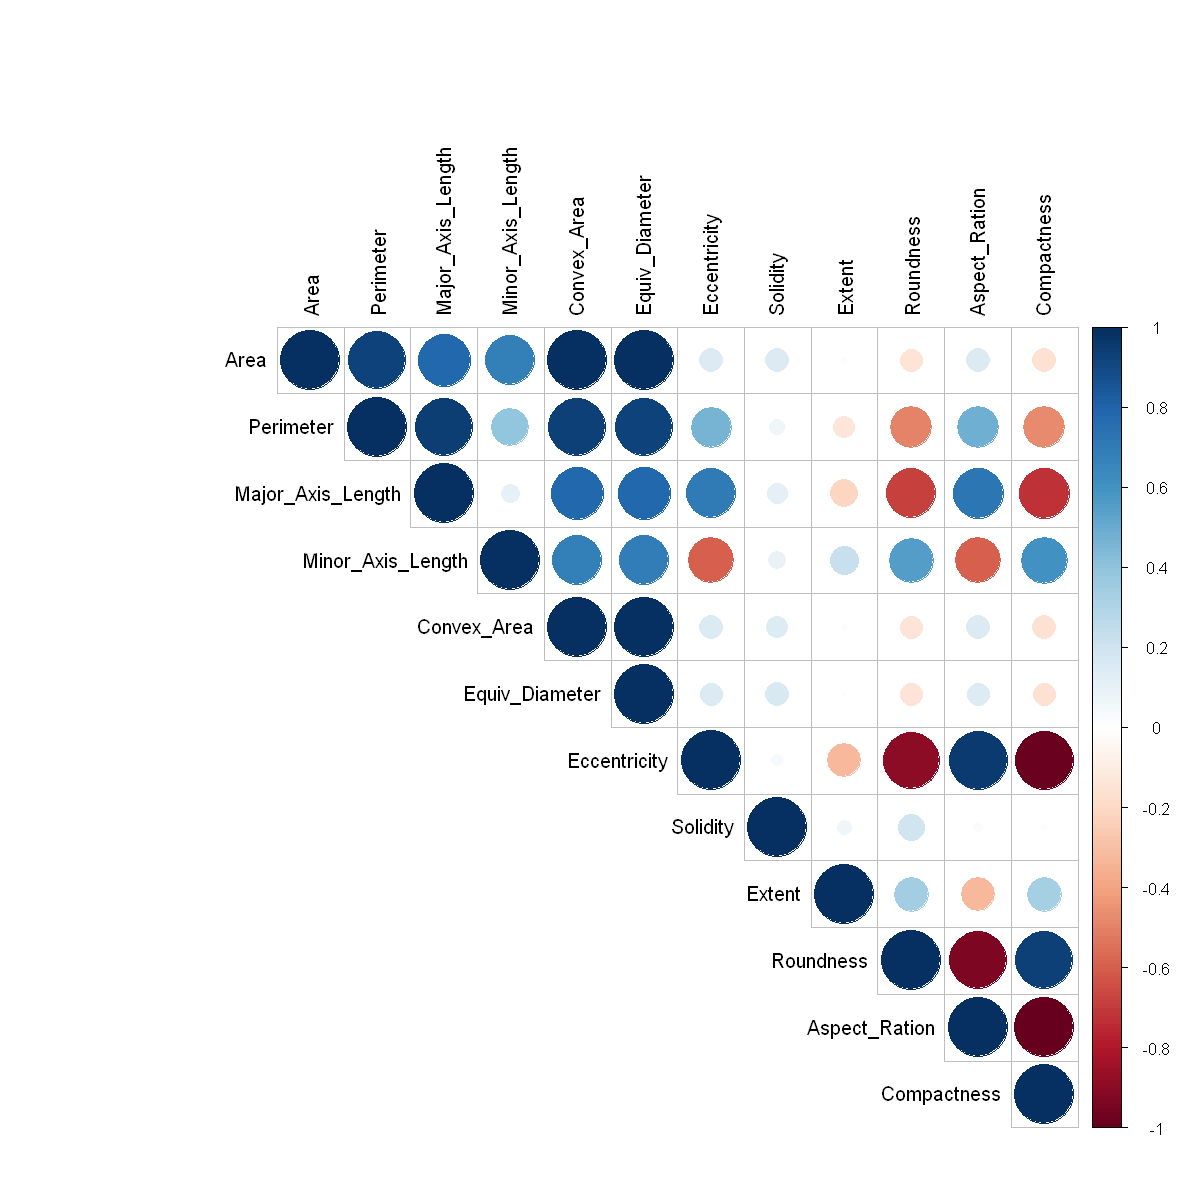

In [18]:
options(repr.plot.width = 10,  
  repr.plot.height = 10 )
corrplot::corrplot(cor(data_b_num)
                   , type = "upper"
                   , number.cex = .6
                   , tl.col = "black"
                   , tl.srt = 90)

Se pueden apreciar pequeñas agrupaciones en variables que aportan información muy similar, por ejemplo relacionada con el tamaño (Minor_Axis_Length y Major_Axis_Length o diametro y area.) También se aprecian correlaciones negativas muy fuertes con la eccentricity y el roundness.

### <font color='#3d59c6'>  3.3 ANÁLISIS PCA </font>

In [19]:
#El hecho de añadir el parametro cor=T es importante ya que aplica el analisis de componentes sobre las variables estandarizadas, útil cuando hay diferentes escalas. 
PCA = princomp(data_b_num, scores = T)
summary(PCA)

Importance of components:
                             Comp.1       Comp.2       Comp.3       Comp.4
Standard deviation     1.954984e+04 1.924194e+02 5.476284e+01 8.404918e+00
Proportion of Variance 9.998951e-01 9.686479e-05 7.845852e-06 1.848141e-07
Cumulative Proportion  9.998951e-01 9.999920e-01 9.999998e-01 1.000000e+00
                             Comp.5       Comp.6       Comp.7       Comp.8
Standard deviation     2.435740e+00 8.751067e-01 5.760900e-02 2.896085e-02
Proportion of Variance 1.552137e-08 2.003504e-09 8.682583e-12 2.194274e-12
Cumulative Proportion  1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
                             Comp.9      Comp.10      Comp.11      Comp.12
Standard deviation     6.545440e-03 3.227134e-03 1.053546e-03 5.071219e-04
Proportion of Variance 1.120846e-13 2.724596e-14 2.903858e-15 6.728108e-16
Cumulative Proportion  1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00

In [20]:
#El hecho de añadir el parametro cor=T es importante ya que aplica el analisis de componentes sobre las variables estandarizadas, útil cuando hay diferentes escalas. 
PCA = princomp(data_b_num,cor=T, scores = T)
summary(PCA)

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4      Comp.5
Standard deviation     2.4265446 2.0243709 1.01843354 0.91795059 0.293243067
Proportion of Variance 0.4906766 0.3415065 0.08643391 0.07021944 0.007165958
Cumulative Proportion  0.4906766 0.8321830 0.91861693 0.98883637 0.996002328
                            Comp.6      Comp.7       Comp.8       Comp.9
Standard deviation     0.193699524 0.075177551 0.0588993725 3.257998e-02
Proportion of Variance 0.003126625 0.000470972 0.0002890947 8.845461e-05
Cumulative Proportion  0.999128954 0.999599926 0.9998890205 9.999775e-01
                            Comp.10      Comp.11      Comp.12
Standard deviation     0.0131300436 9.669023e-03 2.100022e-03
Proportion of Variance 0.0000143665 7.790834e-06 3.675076e-07
Cumulative Proportion  0.9999918417 9.999996e-01 1.000000e+00

In [21]:
loadings(PCA)


Loadings:
                  Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8
Area               0.306  0.331                              0.135  0.525
Perimeter          0.381  0.180               -0.219         0.225 -0.389
Major_Axis_Length  0.409                              0.311  0.345 -0.357
Minor_Axis_Length         0.490                      -0.149 -0.726 -0.142
Convex_Area        0.306  0.330                              0.131  0.513
Equiv_Diameter     0.305  0.332                             -0.119 -0.335
Eccentricity       0.311 -0.300 -0.105         0.649 -0.490              
Solidity                        -0.930  0.275 -0.192 -0.119              
Extent            -0.116  0.153 -0.266 -0.944                            
Roundness         -0.307  0.299 -0.154  0.112  0.648  0.515        -0.145
Aspect_Ration      0.317 -0.305               -0.150  0.581 -0.415  0.108
Compactness       -0.318  0.308               -0.165 -0.118  0.264       
                  Comp.9 Co

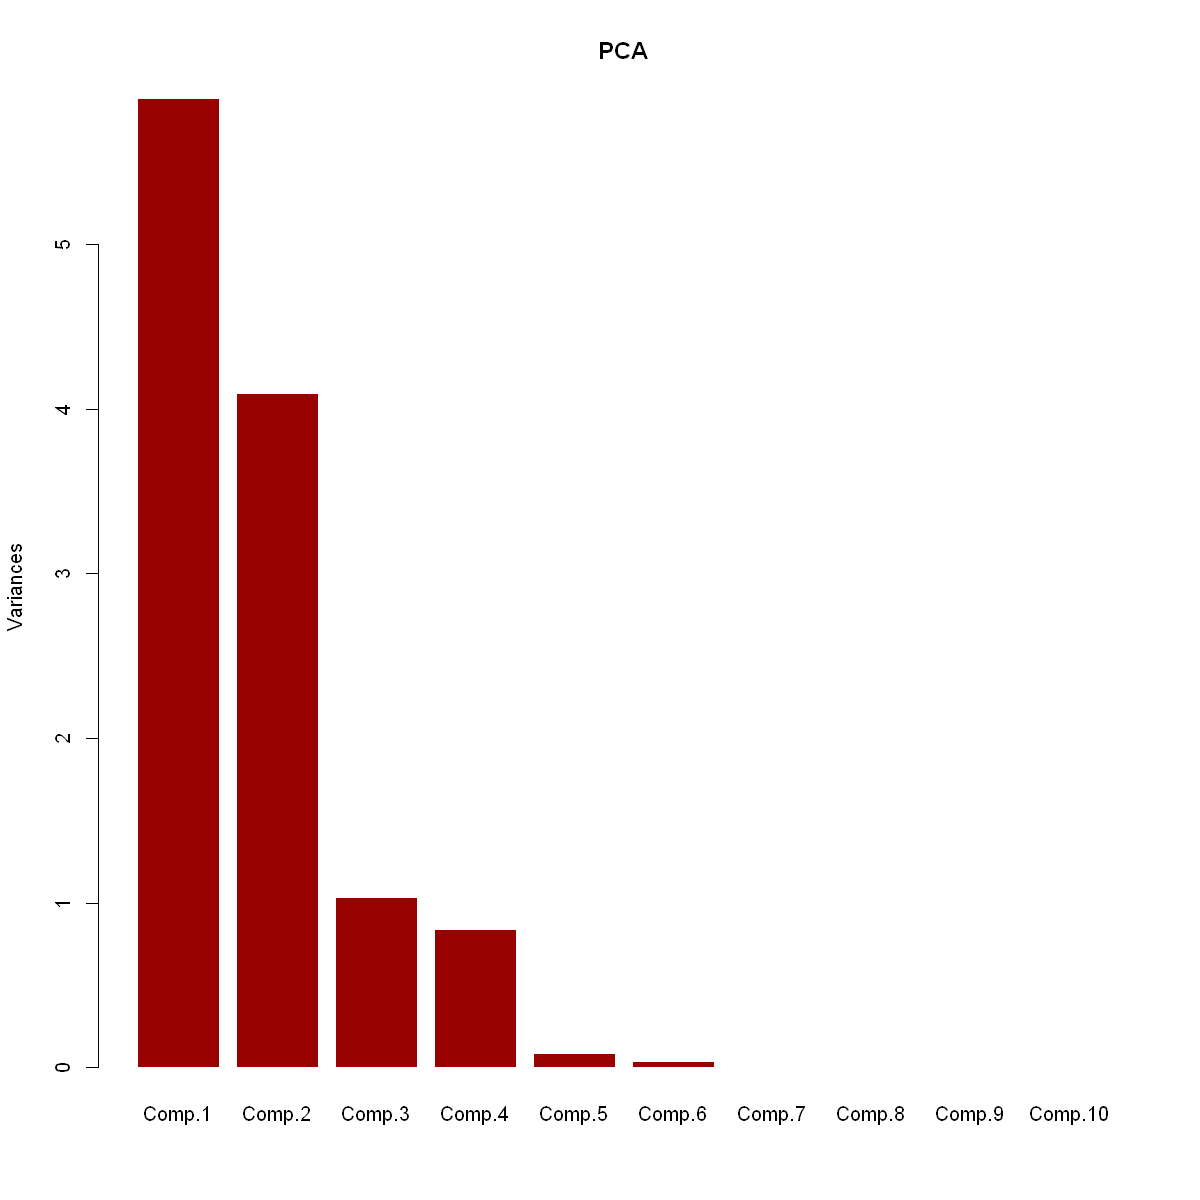

In [22]:
plot(PCA,type="bar",col="#990000", border = FALSE)

Vemos como con la componente 1 y 2 ya seriamos capaces de representar una gran parte del dataset. 

Así pues, en esta prueba, nos quedamaríamos con las tres variables que tienen más peso del componente 1 y las 2 que tienen más peso de la componente dos. Aunque, vemos que muchos pesos estos rapartidos, entre vairiables como 0.3, y vemos como se tratan de variables que tenian correlaciones entre ellas. Por lo tanto, no solo nos figaremos en el PCA, sino tambien en la matriz de correlaciones para escoger las variables que sean más representativas. 

Es decir, si escogemos "Major_Axis_Length" i "Perimeter" de la componente 1, del resto de variables que estan en la componente 1 con un peso cercano al 0.3, cogeriamos una que no tuviera mucha correlación con Major_Axis_Length ni Perimeter, para que así podamos explicar mejor los datos, "compactness" por ejemplo, que además esta 3 en nuestra componente 1, y justo también en nuestro top 3 de información mutua.

Sin embargo, a nivel general vemos como no nos ha dado los mismos resultados de las variables más importantes la PCA que la información mutua, esto es debido que al analizar correlaciones y las variables estar muy ligadas entre ellas al tratarse de areas, la importancia de cada compotente se reparte, sin embargo en la información mutua, estamos buscando información relevante que nos de información sobre nuestra variable objetivo, lo que nos lleva a observar como el aspecto, la eccentricidad y la redondez cogen importancia versus un perimetro que nos sale como la segunda variable más importante en el analisis de PCA.


Vistos los resultados, vamos a realizar un estudio ANOVA para tener un poco más de información sobre cuales son las variables más importantes. 

### <font color='#3d59c6'>  3.4 ANÁLISIS ANOVA </font>

- $H_{0}$: No existen diferencias significativas entre las medias de los grupos
- $H_{1}$: Existen diferencian significativas entre las medias de los grupos

#### Normalidad factor Class

In [23]:
variables = c('Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent', 'Roundness', 'Aspect_Ration', 'Compactness')
categorias = c('Çerçevelik','Ürgüp Sivrisi')
resultados <- data.frame(Variable = character(), Cat = character(), Shapiro = numeric(), PValor = numeric(), row.names = NULL)

for (variable in variables) {
  for (cat in categorias) {
    data_subset = subset(data_b, Class == cat)
    result = shapiro.test(data_subset[, variable])
    resultados = rbind(resultados, data.frame(Variable = variable, Cat = cat, Shapiro = result$statistic, PValor = round(result$p.value, 3)))
  }
}

print(resultados)

             Variable           Cat   Shapiro PValor
W                Area    Çerçevelik 0.9754498  0.000
W1               Area Ürgüp Sivrisi 0.9914241  0.000
W2          Perimeter    Çerçevelik 0.9922997  0.000
W3          Perimeter Ürgüp Sivrisi 0.9978772  0.127
W4  Major_Axis_Length    Çerçevelik 0.9958281  0.002
W5  Major_Axis_Length Ürgüp Sivrisi 0.9981336  0.206
W6  Minor_Axis_Length    Çerçevelik 0.9732877  0.000
W7  Minor_Axis_Length Ürgüp Sivrisi 0.9956497  0.002
W8        Convex_Area    Çerçevelik 0.9751071  0.000
W9        Convex_Area Ürgüp Sivrisi 0.9913986  0.000
W10    Equiv_Diameter    Çerçevelik 0.9825754  0.000
W11    Equiv_Diameter Ürgüp Sivrisi 0.9969669  0.021
W12      Eccentricity    Çerçevelik 0.9342171  0.000
W13      Eccentricity Ürgüp Sivrisi 0.9475643  0.000
W14          Solidity    Çerçevelik 0.7772309  0.000
W15          Solidity Ürgüp Sivrisi 0.6058478  0.000
W16            Extent    Çerçevelik 0.9325814  0.000
W17            Extent Ürgüp Sivrisi 0.9257154 

Muy pocos subconjuntos de datos cumplen normalidad

#### Homocedasticidad factor Class

In [24]:
variables = c('Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent', 'Roundness', 'Aspect_Ration', 'Compactness')
resultados_bartlett = data.frame(Variable = character(), Estadistico = numeric(), PValor = numeric(), row.names = NULL)

for (variable in variables) {
  resultado_bartlett = bartlett.test(get(variable) ~ Class, data = data_b)
  resultados_bartlett = rbind(resultados_bartlett, data.frame(Variable = variable, Estadistico = resultado_bartlett$statistic, PValor = resultado_bartlett$p.value))
}

print(resultados_bartlett)

                                Variable Estadistico       PValor
Bartlett's K-squared                Area  115.341389 6.625154e-27
Bartlett's K-squared1          Perimeter  129.431810 5.455897e-30
Bartlett's K-squared2  Major_Axis_Length  172.518548 2.085035e-39
Bartlett's K-squared3  Minor_Axis_Length   33.095462 8.774326e-09
Bartlett's K-squared4        Convex_Area  113.570758 1.618031e-26
Bartlett's K-squared5     Equiv_Diameter  100.830179 1.002177e-23
Bartlett's K-squared6       Eccentricity   97.931610 4.330848e-23
Bartlett's K-squared7           Solidity    1.659765 1.976351e-01
Bartlett's K-squared8             Extent  408.470395 7.890120e-91
Bartlett's K-squared9          Roundness   45.822188 1.294885e-11
Bartlett's K-squared10     Aspect_Ration  230.548597 4.525883e-52
Bartlett's K-squared11       Compactness   16.318909 5.352716e-05


Rechazamos hipotesis nula, por lo que las variables tienen varianzas distintas. Así pues, realizar una anova no es la mejor técnica, ya que al no tener una homogeniedad clara entre las clases no sabremos con claridad discernir entre las dos categorias. 

De todas, maneras, la realizamos para ver que resultados nos da. 

In [25]:
resultados_anova = data.frame(Variable = character(), F_Value = numeric(), P_Value = numeric(), row.names = NULL)
variables = names(data_b_num)

for (variable in variables) {
  formula = as.formula(paste(variable, '~ Class'))
  anova_result = aov(formula, data = data_b)
  
  # Extraer F value y p-value
  f_value = summary(anova_result)[[1]][['F value']][1]
  p_value = summary(anova_result)[[1]][['Pr(>F)']][1]
 resultados_anova = rbind(resultados_anova, data.frame(Variable = variable, F_Value = f_value, P_Value = p_value))
}

# Muestra los resultados de ANOVA
print(resultados_anova)

            Variable    F_Value       P_Value
1               Area   65.24393  1.037066e-15
2          Perimeter  407.15756  9.298621e-84
3  Major_Axis_Length 1069.83571 2.376531e-194
4  Minor_Axis_Length  467.75379  6.522456e-95
5        Convex_Area   63.34717  2.648389e-15
6     Equiv_Diameter   57.48463  4.837878e-14
7       Eccentricity 2322.61659  0.000000e+00
8           Solidity   38.41072  6.726522e-10
9             Extent  139.08373  3.028119e-31
10         Roundness 1938.14360 8.679338e-311
11     Aspect_Ration 2571.55050  0.000000e+00
12       Compactness 2677.69462  0.000000e+00


Aún así, los test anova one-way con la variable Class nos indica que hay diferencia de medias, tal y como se ha podido ver en primera instancia en nuestros histogramas por areas. 

## <font color='#3d59c6'>  4. MODELO REGRESIÓN LOGÍSTICA </font>

Después de analizar los distintos analísis para observar cuales eran las variables más importantes, se han extraído las siguientes conclusiones. 

Con los análisis de información mutua hemos obtenido 3 variables representativas: Compactness, Aspect_Ration, Eccentricity

Con la PCA, nos quedaremos con los dos más importantes de la componente 1 "Major_Axis_Length" y "Perimeter" y después con el más importante de la componente 2 "Minor_Axis_Length".


In [26]:
data_b_num_subset = subset(data_b, select = c(Compactness, Aspect_Ration, Eccentricity, Major_Axis_Length, Perimeter, Minor_Axis_Length, Class))

In [27]:
head(data_b_num_subset)
tail(data_b_num_subset)

,Compactness,Aspect_Ration,Eccentricity,Major_Axis_Length,Perimeter,Minor_Axis_Length,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,0.8207,1.4809,0.7376,326.1485,888.242,220.2388,Çerçevelik
2,0.7487,1.7811,0.8275,417.1932,1068.146,234.2289,Çerçevelik
3,0.6929,2.0651,0.8749,435.8328,1082.987,211.0457,Çerçevelik
4,0.7624,1.7146,0.8123,381.5638,992.051,222.5322,Çerçevelik
5,0.7557,1.7413,0.8187,383.8883,998.146,220.4545,Çerçevelik
6,0.7522,1.7535,0.8215,405.8132,1041.460,231.4261,Çerçevelik


,Compactness,Aspect_Ration,Eccentricity,Major_Axis_Length,Perimeter,Minor_Axis_Length,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2495,0.6774,2.1594,0.8863,470.3888,1146.431,217.8296,Ürgüp Sivrisi
2496,0.5973,2.7996,0.9340,533.1513,1224.710,190.4367,Ürgüp Sivrisi
2497,0.6433,2.4134,0.9101,462.9416,1084.318,191.8210,Ürgüp Sivrisi
2498,0.6599,2.2828,0.8990,507.2200,1210.314,222.1872,Ürgüp Sivrisi
2499,0.6359,2.4513,0.9130,501.9065,1182.947,204.7531,Ürgüp Sivrisi
2500,0.7104,1.9735,0.8621,462.8951,1159.933,234.5597,Ürgüp Sivrisi


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


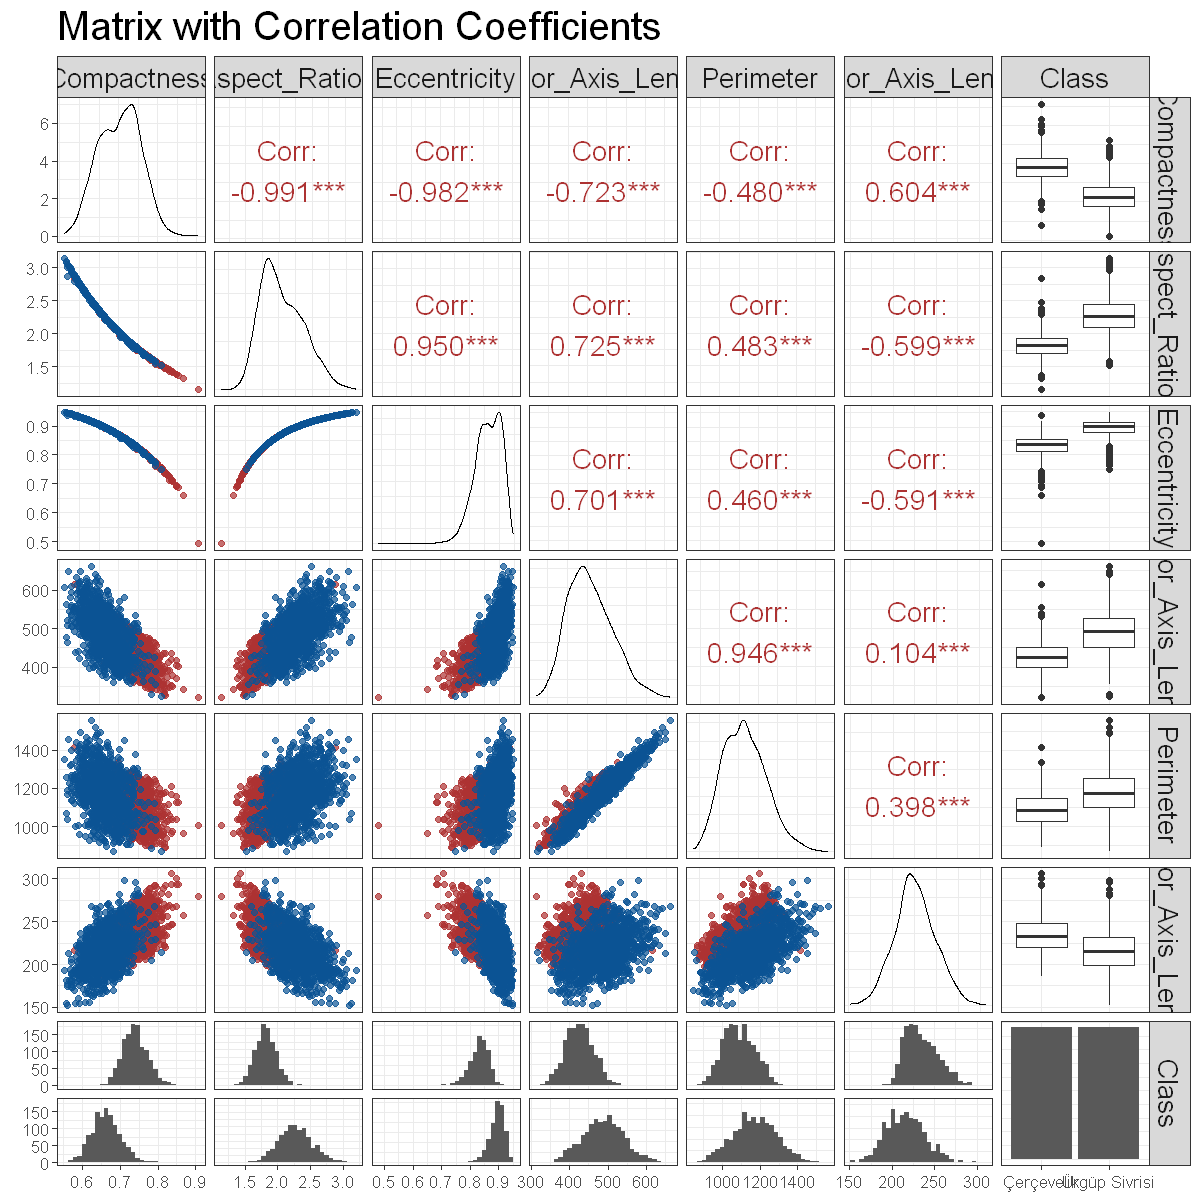

In [28]:
options(repr.plot.width = 10,  repr.plot.height = 10  )

calabaza_C = sum(data_b_num_subset$Class == "Çerçevelik")
calabaza_U = sum(data_b_num_subset$Class == "Ürgüp Sivrisi")
colores = c(rep('#ad3232',calabaza_C), rep('#0b5394',calabaza_U))

ggpairs(
  data_b_num_subset,
  title = "Matrix with Correlation Coefficients",
  lower = list(continuous = wrap("points", alpha = 0.7, color = colores)),
  upper = list(continuous = wrap("cor", size = 6, color ='#ad3232'))) +
theme_bw() +
theme(
  text = element_text(size = 20), 
  axis.text = element_text(size = 10),
  axis.title = element_text(size = 10)
)

Podemos ver como el Compactness con el Ascpect ratio tiene una relación polinónimca más que lineal muy interesante. Por otro lado, todos los grupos de variables, excepto Major_Axis_Length con Perimeter, presentar una clara división de los datos, los cuales se podría trazar una linea que separará estos. Además, si hiceramos agrupaciones, usando el metodo DBSCAN podríamos llegar a tener muy buenos resultados, ya que nuestro dataset se encuentra balanceado, pero vemos como en el boxplot hay más color azul que rojo, lo que indica que los puntos rojos estan mas concetrados y por lo tanto tienen mayor densidad.

Dicho esto, primero realizaremos un primer modelo solo con la variable Compactness, ya que vemos como se pueden distinguir las medias y los intercuantiles en los boxplots :') 

### <font color='#3d59c6'>  4.1 FASE TRAIN </font>

In [83]:
#Convertimos nuestra varaible categorica en numerica donde Çerçevelik sera 1 y Ürgüp Sivrisi 0
df = data_b
df$Class <- as.numeric(df$Class == "Ürgüp Sivrisi")
head(df)
tail(df)
table(df$Class)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,0
2,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,0
3,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,0
4,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,0
5,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,0
6,73191,1041.460,405.8132,231.4261,73969,305.2698,0.8215,0.9895,0.7165,0.8480,1.7535,0.7522,0


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2495,79755,1146.431,470.3888,217.8296,80649,318.6647,0.8863,0.9889,0.7175,0.7626,2.1594,0.6774,1
2496,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,1
2497,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,1
2498,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,1
2499,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,1
2500,84934,1159.933,462.8951,234.5597,85781,328.8485,0.8621,0.9901,0.7360,0.7933,1.9735,0.7104,1



   0    1 
1200 1200 

In [120]:
#set.seed(5) resultados malos
set.seed(33)

inTrain = createDataPartition(y = df$Class
                                  , p = .80
                                  , list = FALSE
                                  , times = 1)
data.train = df[inTrain,]
data.test = df[-inTrain,]

ytrain = df$Class[inTrain]
ytest = df$Class[-inTrain]

In [105]:
### Generamos un primer modelo unicamente con la variable Compactness
mrl0 = glm(formula = Class ~ Compactness
          , data = data.train
          , family = "binomial")
summary(mrl0)


Call:
glm(formula = Class ~ Compactness, family = "binomial", data = data.train)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   41.627      1.854   22.45   <2e-16 ***
Compactness  -59.118      2.626  -22.52   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2661.7  on 1919  degrees of freedom
Residual deviance: 1249.5  on 1918  degrees of freedom
AIC: 1253.5

Number of Fisher Scoring iterations: 6


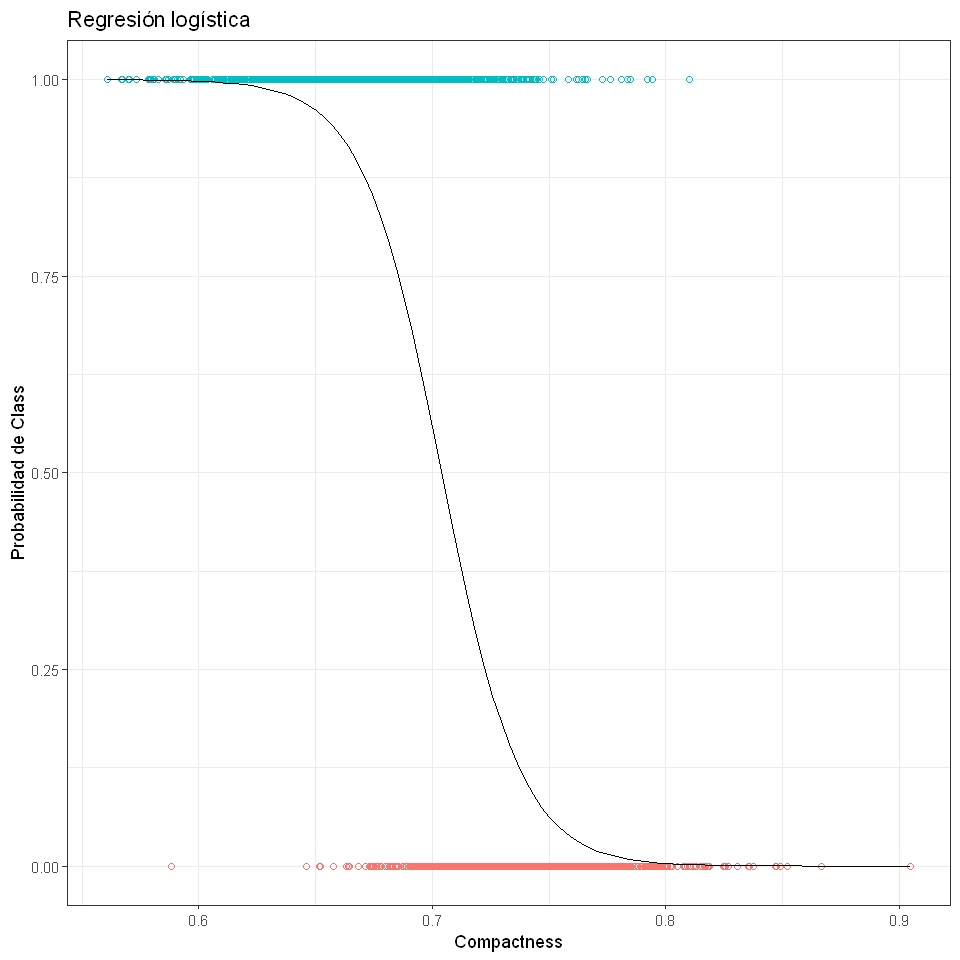

In [106]:
# Representación gráfica del modelo.
options(repr.plot.width = 8,  repr.plot.height = 8  )
ggplot(data = data.train, aes(x = Compactness, y = Class)) +
  geom_point(aes(color = as.factor(Class)), shape = 1) + 
  stat_function(fun = function(x){predict(mrl0,
                                          newdata = data.frame(Compactness = x),
                                          type = "response")}) +
  theme_bw() +
  labs(title = "Regresión logística",
       y = "Probabilidad de Class") +
  theme(legend.position = "none")

Vemos como hay muchas muestras que se superponen, por lo tanto no parece dar muy buenos resultados. A primera vista. 

Probamos con todas las variables seleccionadas previamente

In [107]:
head(data.train)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,0
3,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,0
5,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,0
6,73191,1041.460,405.8132,231.4261,73969,305.2698,0.8215,0.9895,0.7165,0.8480,1.7535,0.7522,0
7,73338,1020.055,392.2516,238.5494,73859,305.5762,0.7938,0.9929,0.7187,0.8857,1.6443,0.7790,0
8,69692,1049.108,421.4875,211.7707,70442,297.8836,0.8646,0.9894,0.6736,0.7957,1.9903,0.7067,0


In [108]:
### Generamos un primer modelo con las variables consideradas importantes por los diferentes análisis
mrl1 = glm(formula = Class ~ Compactness + Aspect_Ration + Major_Axis_Length + Perimeter  + Eccentricity + Minor_Axis_Length
          , data = data.train
          , family = "binomial")
summary(mrl1)


Call:
glm(formula = Class ~ Compactness + Aspect_Ration + Major_Axis_Length + 
    Perimeter + Eccentricity + Minor_Axis_Length, family = "binomial", 
    data = data.train)

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)        76.695894  52.179628   1.470 0.141604    
Compactness       -73.087242  45.005724  -1.624 0.104386    
Aspect_Ration       8.510488   6.560088   1.297 0.194523    
Major_Axis_Length   0.016792   0.025220   0.666 0.505525    
Perimeter          -0.016171   0.006294  -2.569 0.010188 *  
Eccentricity      -51.410820  14.058909  -3.657 0.000255 ***
Minor_Axis_Length   0.056130   0.050385   1.114 0.265275    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2661.7  on 1919  degrees of freedom
Residual deviance: 1215.9  on 1913  degrees of freedom
AIC: 1229.9

Number of Fisher Scoring iterations: 10


 Observamos como Aspect_Ration, Major_Axis_Length y Minor_Axis_Length no son significativas por lo que aportan ruido al modelo, así pues, las quitaremos y realizaremos otro modelo. 

In [109]:
### Generamos un primer modelo con las variables consideradas importantes por los diferentes análisis
mrl2 = glm(formula = Class ~ Compactness  + Perimeter  + Eccentricity 
          , data = data.train
          , family = "binomial")
summary(mrl2)


Call:
glm(formula = Class ~ Compactness + Perimeter + Eccentricity, 
    family = "binomial", data = data.train)

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.246e+02  1.454e+01   8.567  < 2e-16 ***
Compactness  -1.074e+02  9.100e+00 -11.803  < 2e-16 ***
Perimeter     1.617e-03  7.795e-04   2.074   0.0381 *  
Eccentricity -5.865e+01  9.493e+00  -6.178 6.48e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2661.7  on 1919  degrees of freedom
Residual deviance: 1228.6  on 1916  degrees of freedom
AIC: 1236.6

Number of Fisher Scoring iterations: 6


Vemos ahora, como Perimeter en esta situación no tiene visibilidad, así que la quitaremos también.

In [110]:
head(data.train)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,0
3,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,0
5,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,0
6,73191,1041.460,405.8132,231.4261,73969,305.2698,0.8215,0.9895,0.7165,0.8480,1.7535,0.7522,0
7,73338,1020.055,392.2516,238.5494,73859,305.5762,0.7938,0.9929,0.7187,0.8857,1.6443,0.7790,0
8,69692,1049.108,421.4875,211.7707,70442,297.8836,0.8646,0.9894,0.6736,0.7957,1.9903,0.7067,0


In [111]:
### Generamos un primer modelo con las variables consideradas importantes por los diferentes análisis
mrl3 = glm(formula = Class ~ Compactness + Eccentricity 
          , data = data.train
          , family = "binomial")
summary(mrl3)


Call:
glm(formula = Class ~ Compactness + Eccentricity, family = "binomial", 
    data = data.train)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)   128.368     14.466   8.874  < 2e-16 ***
Compactness  -109.416      9.073 -12.060  < 2e-16 ***
Eccentricity  -59.309      9.502  -6.242 4.32e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2661.7  on 1919  degrees of freedom
Residual deviance: 1232.9  on 1917  degrees of freedom
AIC: 1238.9

Number of Fisher Scoring iterations: 6


Finalmente, nos quedamos con este modelo donde las dos variables aportan información.

In [112]:
### Generamos las predicciones de nuestro modelo
mrl3_prob = predict(mrl3, type = 'response')
head(mrl3_prob)

2          3          5          6          7          8 
0.06726448 0.66031612 0.05347990 0.06558376 0.01896343 0.44167647

In [113]:
### Vemos la predicción para cada instancia
mrl3_pred = ifelse(mrl3_prob > 0.5, 1, 0)
head(mrl3_pred)

2 3 5 6 7 8 
0 1 0 0 0 0

In [114]:
confusionMatrix(as.factor(mrl3_pred), as.factor(data.train$Class))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 851 158
         1 109 802
                                          
               Accuracy : 0.8609          
                 95% CI : (0.8446, 0.8761)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7219          
                                          
 Mcnemar's Test P-Value : 0.003308        
                                          
            Sensitivity : 0.8865          
            Specificity : 0.8354          
         Pos Pred Value : 0.8434          
         Neg Pred Value : 0.8804          
             Prevalence : 0.5000          
         Detection Rate : 0.4432          
   Detection Prevalence : 0.5255          
      Balanced Accuracy : 0.8609          
                                          
       'Positive' Class : 0               
                              

Para ser el modelo de entramiento, todo y que no supera el 90%, podemos asegurar que con un 86% Acertariamos el tipo de calabaza simplemente sabiendo dos variables.

Además, la hipótesis nula (H0) de la prueba de McNemar es que las dos formas de clasificación (predicciones del modelo vs clasificaciones reales) son igualmente buenas, lo que implica que no hay diferencia significativa entre estas dos formas, por lo tanto rechazamos hipotesis nula, lo que nos indica que existe una diferencia significativa entre las proporciones de éxito/fallo entre las dos condiciones evaluadas. 

### <font color='#3d59c6'>  4.2 FASE TEST </font>

In [115]:
pred_mrl3= predict(mrl3,newdata = data.test, type="response")
mrl3_pred = ifelse(pred_mrl3 > 0.5, 1, 0)
confusionMatrix(as.factor(mrl3_pred), as.factor(data.test$Class))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 210  36
         1  30 204
                                         
               Accuracy : 0.8625         
                 95% CI : (0.8284, 0.892)
    No Information Rate : 0.5            
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.725          
                                         
 Mcnemar's Test P-Value : 0.5383         
                                         
            Sensitivity : 0.8750         
            Specificity : 0.8500         
         Pos Pred Value : 0.8537         
         Neg Pred Value : 0.8718         
             Prevalence : 0.5000         
         Detection Rate : 0.4375         
   Detection Prevalence : 0.5125         
      Balanced Accuracy : 0.8625         
                                         
       'Positive' Class : 0              
                                         

La siguiente explicación es de antes de cambiar la asignación de las clases, en las conclusiones se explicará todo. 

Sin embargo, al realizar el test, vemos que la accuracy ha disminuido, nuestro valor Kappa también (Nos indica como de cerca esta el evaluador de la realidad, siendo 1 máxima coherencia), y como vemos en este caso tenemos que aceptar hipotesis nula, lo que sugiere que las discrepancias entre las predicciones del modelo y los valores reales ocurren por azar en una proporción similar. Esto indica que el modelo no tiene un sesgo sistemático hacia falsos positivos o falsos negativos. Por esta razón, se debería de descartar el mnodel puesto que no cumple los supuestos.

Vamos a probar de añadir la variable Roundness a nuestro modelo, ya que era la 4 en nuestro analásis de información mutua y quizá no se debería de haber eliminado. 

In [116]:
### Generamos un primer modelo con las variables consideradas importantes por los diferentes análisis
mrl4 = glm(formula = Class ~ Eccentricity + Compactness + Roundness 
          , data = data.train
          , family = "binomial")
summary(mrl4)


Call:
glm(formula = Class ~ Eccentricity + Compactness + Roundness, 
    family = "binomial", data = data.train)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)   145.129     15.830   9.168  < 2e-16 ***
Eccentricity  -71.668     10.556  -6.789 1.13e-11 ***
Compactness  -132.732     12.235 -10.848  < 2e-16 ***
Roundness      13.021      4.364   2.984  0.00285 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2661.7  on 1919  degrees of freedom
Residual deviance: 1223.6  on 1916  degrees of freedom
AIC: 1231.6

Number of Fisher Scoring iterations: 6


Vemos como tiene relevancia

In [117]:
mrl4_prob = predict(mrl4, type = 'response')
mrl4_pred = ifelse(mrl4_prob > 0.5, 1, 0)
confusionMatrix(as.factor(mrl4_pred), as.factor(data.train$Class))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 856 149
         1 104 811
                                         
               Accuracy : 0.8682         
                 95% CI : (0.8523, 0.883)
    No Information Rate : 0.5            
    P-Value [Acc > NIR] : < 2e-16        
                                         
                  Kappa : 0.7365         
                                         
 Mcnemar's Test P-Value : 0.00567        
                                         
            Sensitivity : 0.8917         
            Specificity : 0.8448         
         Pos Pred Value : 0.8517         
         Neg Pred Value : 0.8863         
             Prevalence : 0.5000         
         Detection Rate : 0.4458         
   Detection Prevalence : 0.5234         
      Balanced Accuracy : 0.8682         
                                         
       'Positive' Class : 0              
                                         

Vemos como la accuracy ha aumentado un poco pero no mucho. 

In [118]:
head(data.train)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,0
3,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,0
5,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,0
6,73191,1041.460,405.8132,231.4261,73969,305.2698,0.8215,0.9895,0.7165,0.8480,1.7535,0.7522,0
7,73338,1020.055,392.2516,238.5494,73859,305.5762,0.7938,0.9929,0.7187,0.8857,1.6443,0.7790,0
8,69692,1049.108,421.4875,211.7707,70442,297.8836,0.8646,0.9894,0.6736,0.7957,1.9903,0.7067,0


In [119]:
pred_mrl4= predict(mrl4,newdata = data.test, type="response")
mrl4_pred = ifelse(pred_mrl4 > 0.5, 1, 0)
confusionMatrix(as.factor(mrl4_pred), as.factor(data.test$Class))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 213  37
         1  27 203
                                          
               Accuracy : 0.8667          
                 95% CI : (0.8329, 0.8958)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7333          
                                          
 Mcnemar's Test P-Value : 0.2606          
                                          
            Sensitivity : 0.8875          
            Specificity : 0.8458          
         Pos Pred Value : 0.8520          
         Neg Pred Value : 0.8826          
             Prevalence : 0.5000          
         Detection Rate : 0.4437          
   Detection Prevalence : 0.5208          
      Balanced Accuracy : 0.8667          
                                          
       'Positive' Class : 0               
                              

## <font color='#3d59c6'>  5. CONCLUSIONES </font>

Esta entrega se ha terminado con más preguntas que respuestas. Como se ha podido comprobar en los analisis, los datos aparantemente, no cumplian todos los supuestos de separabilidad para realizar una regresión logística, pero sin embargo después, aplicando los modelos, se han obtenido accuracys bastante elevadas y se han podido rechazar hipotesis nulas del test de Mcnemar. Sin embargo, después de que el test inicial diera malos resultados, se ha empezado a investigar y se ha ido probando con una serie de variables, pensando que si añadiamos una variable que nos habíamos dejado de la información mutua, obtendríamos resultados, más consistentes, y resulta que no ha sido así. Entonces, he preguntado a un compañero, el cual él si que me había dicho que a el le habían dado resultados consistentes, en ese momento, he empezado a dudar sobre mi partición en los datos, sobre mis analisis, así pues he seguido investigando, y se han encontrado dos diferencias.

La primera de todas, es que el compañero había asignado la variable 1 y 0 a las clases opuestas a las mías, en primera instancia esto no pensaba que iba a marcar la diferencia, pero sí, lo ha hecho. (así se ha quedado en la entrega). Después se ha visto que la semilla era diferente, y con la semilla que él tenía si que funcionaba correctamente, y con la que se había asignado en clase, no pasaba los test de Mcnemar. 

Esto me ha llevado a diferentes suposiciones, que sinceramente, sin la ayuda del compañero no hubiera llegado, y es que muchas veces asumimos que la aleatoridad en la que asignamos nuestros datos es la más equiprobable y la damos por buena. En mi entrega inicial, si no hubiera querido investigar más, hubiera dado el modelo por malo, porque he tenido que aceptar hipotesis nula y por lo que hubiera aceptado que las discrepancias entre las predicciones del modelo y los valores reales ocurren por azar en una proporción similar. Y no hubiera sido una afirmación incorrecta.

Sin embargo, la afirmación correcta, para esta entrega y para cuando se realicen análisis donde ya se vea que no se estan cumpliendo todos los supuestos, es realizar los mismo, con diferentes semillas, y guardar todos los análisis y después evaluar si estos son consistentes o no. Ya que solo de esta manera, se puede granatizar con seguridad (cuando tenemos datos que hay supuestos que no se cumplen).

Así pues, cabe concluir que esta entrega de entropía, ha sido un caos :')